# Libraries

In [1]:
#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

# Modeling libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
import kmapper as km


from matplotlib_inline.backend_inline import set_matplotlib_formats
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")


# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

# Data Preprocess

In [2]:
df = pd.read_csv('METABRIC_RNA_Mutation.csv', delimiter=',')
df.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1.0                   Positve  ...        0   
1                        LumA     1.0                   Positve  ...        0   
2                        LumB     1.0                   Positve  ...        0   
3                        LumB     1.0                   Positve  ...        0   
4                        LumB     1.0                   Positve  ...        0   

   ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut smarcb1_mut  \
0           0           0        0          0         0         0           0   
1           0           0        0          0         0         0           0   
2           0           0        0          0         0         0           0   
3           0           0        0          0         0         0           0   
4           0           0        0          0         0         0           0   

  stmn2_mut  siah1_mut  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  

[5 rows x 693 columns]

In [3]:
df[['death_from_cancer', 'overall_survival']]

death_from_cancer  overall_survival
0                   Living                 1
1                   Living                 1
2          Died of Disease                 0
3                   Living                 1
4          Died of Disease                 0
...                    ...               ...
1899                Living                 1
1900       Died of Disease                 0
1901       Died of Disease                 0
1902  Died of Other Causes                 0
1903  Died of Other Causes                 0

[1904 rows x 2 columns]

In [4]:
df['death_from_cancer'].value_counts()

death_from_cancer
Living                  801
Died of Disease         622
Died of Other Causes    480
Name: count, dtype: int64

In [5]:
df = df[df['death_from_cancer'].isin(['Living', 'Died of Disease'])]
df

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1897        7293             56.90             MASTECTOMY  Breast Cancer   
1898        7294             59.20             MASTECTOMY  Breast Cancer   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1897           Breast Invasive Ductal Carcinoma        High             0   
1898           Breast Invasive Ductal Carcinoma        High             0   
1899          Breast Invasive Lobular Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1897                        LumA     4.0                   Positve  ...   
1898                        LumB     4.0                   Positve  ...   
1899                        LumA     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
0           0           0           0        0          0         0         0   
1           0           0           0        0          0         0         0   
2           0           0           0        0          0         0         0   
3           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1897        0           0           0        0          0         0         0   
1898        0           0           0        0          0         0         0   
1899        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  
...          ...       ...        ...  
1897          

In [6]:
# Shorten cancer type labels
short_label={'Breast Invasive Ductal Carcinoma': 'IDC',
             'Breast Invasive Lobular Carcinoma': 'ILC',
             'Breast Mixed Ductal and Lobular Carcinoma': 'MDLC',
             'Breast Invasive Mixed Mucinous Carcinoma': 'IMMC',
             'Metaplastic Breast Cancer': 'MBC'}

df['cancer_type_detailed'] = df['cancer_type_detailed'].map(short_label)

In [7]:
print(df['cancer_type_detailed'].value_counts())
print(df['oncotree_code'].value_counts())

cancer_type_detailed
IDC     1136
MDLC     141
ILC      104
IMMC      17
Name: count, dtype: int64
oncotree_code
IDC       1136
MDLC       141
ILC        104
IMMC        17
BREAST      15
Name: count, dtype: int64


In [8]:
# Drop unspecified breast cancer rows and oncotree_code column
rows_to_drop = df[df['oncotree_code'] == 'BREAST'].index
df.drop(rows_to_drop, axis=0, inplace=True)
df.drop('oncotree_code', axis=1, inplace=True)

# Drop unneeded columns
drop_list = ['patient_id', 'cancer_type', 'cohort', 'overall_survival_months', 'death_from_cancer', 'tumor_size', 'lymph_nodes_examined_positive']
df = df.drop(drop_list, axis=1)

In [9]:
# Check missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) 
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_NaN'])
missing_data.head(12)

Total_NaN  Percent_NaN
tumor_stage                           338     0.240057
3-gene_classifier_subtype             149     0.105824
primary_tumor_laterality               78     0.055398
cellularity                            41     0.029119
mutation_count                         38     0.026989
neoplasm_histologic_grade              35     0.024858
er_status_measured_by_ihc              20     0.014205
type_of_breast_surgery                 15     0.010653
tumor_other_histologic_subtype         10     0.007102
cancer_type_detailed                   10     0.007102
ar                                      0     0.000000
cyp11b2                                 0     0.000000

In [10]:
# Drop rows with missing data
df_dp = df.dropna()
df_dp.head()

age_at_diagnosis type_of_breast_surgery cancer_type_detailed cellularity  \
1              43.19      BREAST CONSERVING                  IDC        High   
4              76.97             MASTECTOMY                 MDLC        High   
5              78.77             MASTECTOMY                  IDC    Moderate   
9              84.22             MASTECTOMY                  ILC        High   
10             85.49             MASTECTOMY                  IDC    Moderate   

    chemotherapy pam50_+_claudin-low_subtype er_status_measured_by_ihc  \
1              0                        LumA                   Positve   
4              1                        LumB                   Positve   
5              0                        LumB                   Positve   
9              0                        Her2                  Negative   
10             0                        LumA                   Positve   

   er_status  neoplasm_histologic_grade her2_status_measured_by_snp6  ...  \
1   Positive                        3.0                      NEUTRAL  ...   
4   Positive                        3.0                      NEUTRAL  ...   
5   Positive                        3.0                      NEUTRAL  ...   
9   Positive                        2.0                         LOSS  ...   
10  Positive                        2.0                      NEUTRAL  ...   

   mtap_mut ppp2cb_mut  smarcd1_mut nras_mut ndfip1_mut hras_mut  prps2_mut  \
1         0          0            0        0          0        0          0   
4         0          0            0        0          0        0          0   
5         0          0            0        0          0        0          0   
9         0          0            0        0          0        0          0   
10        0          0            0        0          0        0          0   

    smarcb1_mut  stmn2_mut siah1_mut  
1             0          0         0  
4             0          0         0  
5             0          0         0  
9             0          0         0  
10            0          0         0  

[5 rows x 685 columns]

# Visualization and Statistics Analysis

## Clinical columns

In [11]:
df_dp.columns.get_loc('brca1')

23

In [12]:
clinical_df = df_dp.drop(df.columns[23:], axis=1)
clinical_df

age_at_diagnosis type_of_breast_surgery cancer_type_detailed  \
1                43.19      BREAST CONSERVING                  IDC   
4                76.97             MASTECTOMY                 MDLC   
5                78.77             MASTECTOMY                  IDC   
9                84.22             MASTECTOMY                  ILC   
10               85.49             MASTECTOMY                  IDC   
...                ...                    ...                  ...   
1613             68.43             MASTECTOMY                  IDC   
1616             75.33             MASTECTOMY                  IDC   
1619             70.65      BREAST CONSERVING                 MDLC   
1623             52.84      BREAST CONSERVING                 MDLC   
1664             63.20      BREAST CONSERVING                 IMMC   

     cellularity  chemotherapy pam50_+_claudin-low_subtype  \
1           High             0                        LumA   
4           High             1                        LumB   
5       Moderate             0                        LumB   
9           High             0                        Her2   
10      Moderate             0                        LumA   
...          ...           ...                         ...   
1613        High             0                        LumA   
1616        High             0                        LumA   
1619        High             0                        LumB   
1623        High             1                      Normal   
1664        High             0                        LumB   

     er_status_measured_by_ihc er_status  neoplasm_histologic_grade  \
1                      Positve  Positive                        3.0   
4                      Positve  Positive                        3.0   
5                      Positve  Positive                        3.0   
9                     Negative  Positive                        2.0   
10                     Positve  Positive                        2.0   
...                        ...       ...                        ...   
1613                   Positve  Positive                        2.0   
1616                   Positve  Positive                        1.0   
1619                   Positve  Positive                        1.0   
1623                   Positve  Positive                        2.0   
1664                   Positve  Positive                        2.0   

     her2_status_measured_by_snp6  ... inferred_menopausal_state  \
1                         NEUTRAL  ...                       Pre   
4                         NEUTRAL  ...                      Post   
5                         NEUTRAL  ...                      Post   
9                            LOSS  ...                      Post   
10                        NEUTRAL  ...                      Post   
...                           ...  ...                       ...   
1613                      NEUTRAL  ...                      Post   
1616                      NEUTRAL  ...                      Post   
1619                      NEUTRAL  ...                      Post   
1623                      NEUTRAL  ...                      Post   
1664                      NEUTRAL  ...                      Post   

     integrative_cluster  primary_tumor_laterality mutation_count  \
1                   4ER+                     Right            2.0   
4                      9                     Right            2.0   
5                      7                      Left            4.0   
9                      3                      Left            5.0   
10                     3                      Left            1.0   
...                  ...                       ...            ...   
1613                   7                     Right           17.0   
1616                   8                     Right            5.0   
1619                   8                      Left            9.0   
1623                   8                     Right          

### Numeric clinical features

In [13]:
num_col = ['age_at_diagnosis', 'mutation_count', 'nottingham_prognostic_index']
num_df = df_dp[num_col]
numerical_df = pd.concat([num_df, df_dp[['overall_survival']]], axis=1)
num_df

age_at_diagnosis  mutation_count  nottingham_prognostic_index
1                43.19             2.0                        4.020
4                76.97             2.0                        6.080
5                78.77             4.0                        4.062
9                84.22             5.0                        3.056
10               85.49             1.0                        3.044
...                ...             ...                          ...
1613             68.43            17.0                        3.032
1616             75.33             5.0                        2.030
1619             70.65             9.0                        2.040
1623             52.84             5.0                        5.040
1664             63.20             3.0                        3.044

[849 rows x 3 columns]

In [14]:
numerical_df[numerical_df['overall_survival']==1].describe()

age_at_diagnosis  mutation_count  nottingham_prognostic_index  \
count        479.000000      479.000000                   479.000000   
mean          56.010146        4.939457                     3.928996   
std           11.436603        3.063226                     0.988588   
min           26.720000        1.000000                     2.002000   
25%           47.800000        3.000000                     3.040000   
50%           55.950000        4.000000                     4.036000   
75%           63.845000        6.000000                     5.016500   
max           85.210000       26.000000                     6.198000   

       overall_survival  
count             479.0  
mean                1.0  
std                 0.0  
min                 1.0  
25%                 1.0  
50%                 1.0  
75%                 1.0  
max                 1.0

In [15]:
numerical_df[numerical_df['overall_survival']==0].describe()

age_at_diagnosis  mutation_count  nottingham_prognostic_index  \
count        370.000000      370.000000                   370.000000   
mean          60.129486        5.829730                     4.525795   
std           13.672012        3.867127                     1.075285   
min           21.930000        1.000000                     2.020000   
25%           50.487500        3.000000                     4.034000   
50%           61.135000        5.000000                     4.096000   
75%           69.820000        8.000000                     5.080000   
max           96.290000       30.000000                     6.360000   

       overall_survival  
count             370.0  
mean                0.0  
std                 0.0  
min                 0.0  
25%                 0.0  
50%                 0.0  
75%                 0.0  
max                 0.0

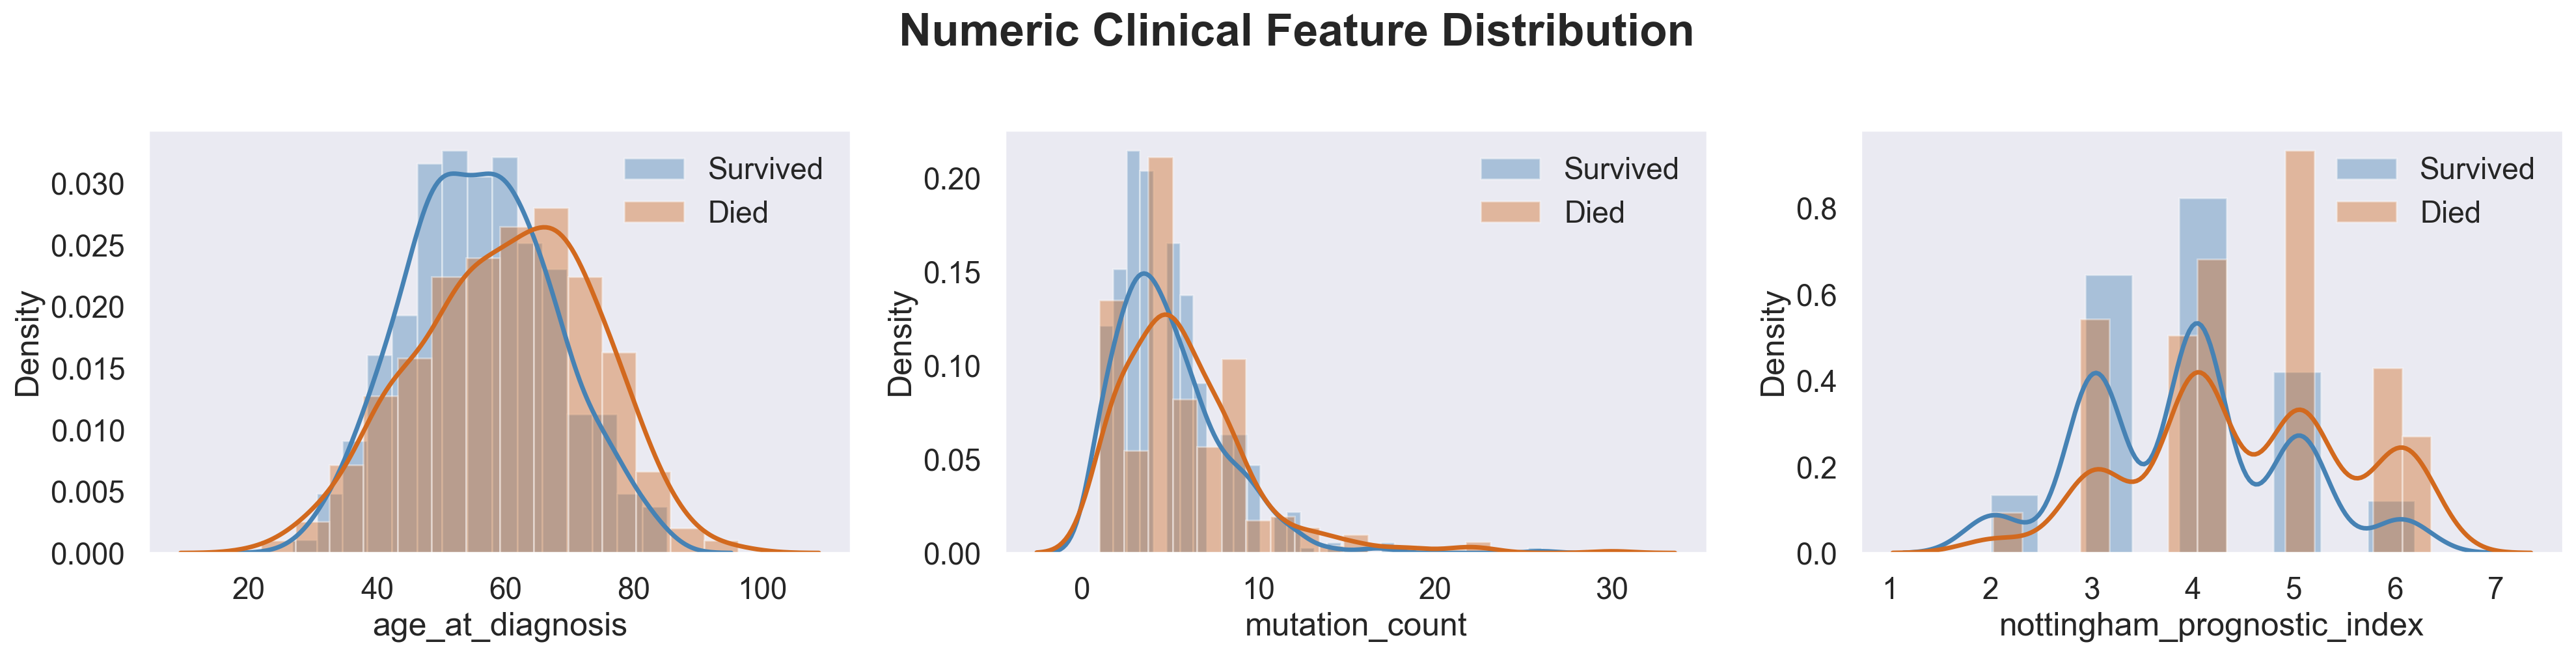

In [16]:
# Distplot of numeric clinical features and survival status
s = 'steelblue'
d = 'chocolate'

fig = plt.figure(figsize=(20,30))
j = 0

for col in num_col:
    plt.subplot(7, 3, j+1)
    j += 1
    
    sns.distplot(numerical_df[col][numerical_df['overall_survival']==1], color=s, label = 'Survived', kde_kws={'linewidth': 2.5},)
    sns.distplot(numerical_df[col][numerical_df['overall_survival']==0], color=d, label = 'Died', kde_kws={'linewidth': 2.5})
    
    plt.legend(loc='best')
    plt.grid(False)
    
font_dict = {
    'weight': 'bold',  
    'size': 25
}
fig.suptitle('Numeric Clinical Feature Distribution', **font_dict)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [17]:
# data melting for boxplot visualization
data = pd.melt(numerical_df, id_vars='overall_survival',
                             var_name='features',
                             value_name='value')

data['survival_label'] = data['overall_survival'].map({0: 'Died', 1: 'Survived'})

data.head()

overall_survival          features  value survival_label
0                 1  age_at_diagnosis  43.19       Survived
1                 0  age_at_diagnosis  76.97           Died
2                 0  age_at_diagnosis  78.77           Died
3                 0  age_at_diagnosis  84.22           Died
4                 0  age_at_diagnosis  85.49           Died

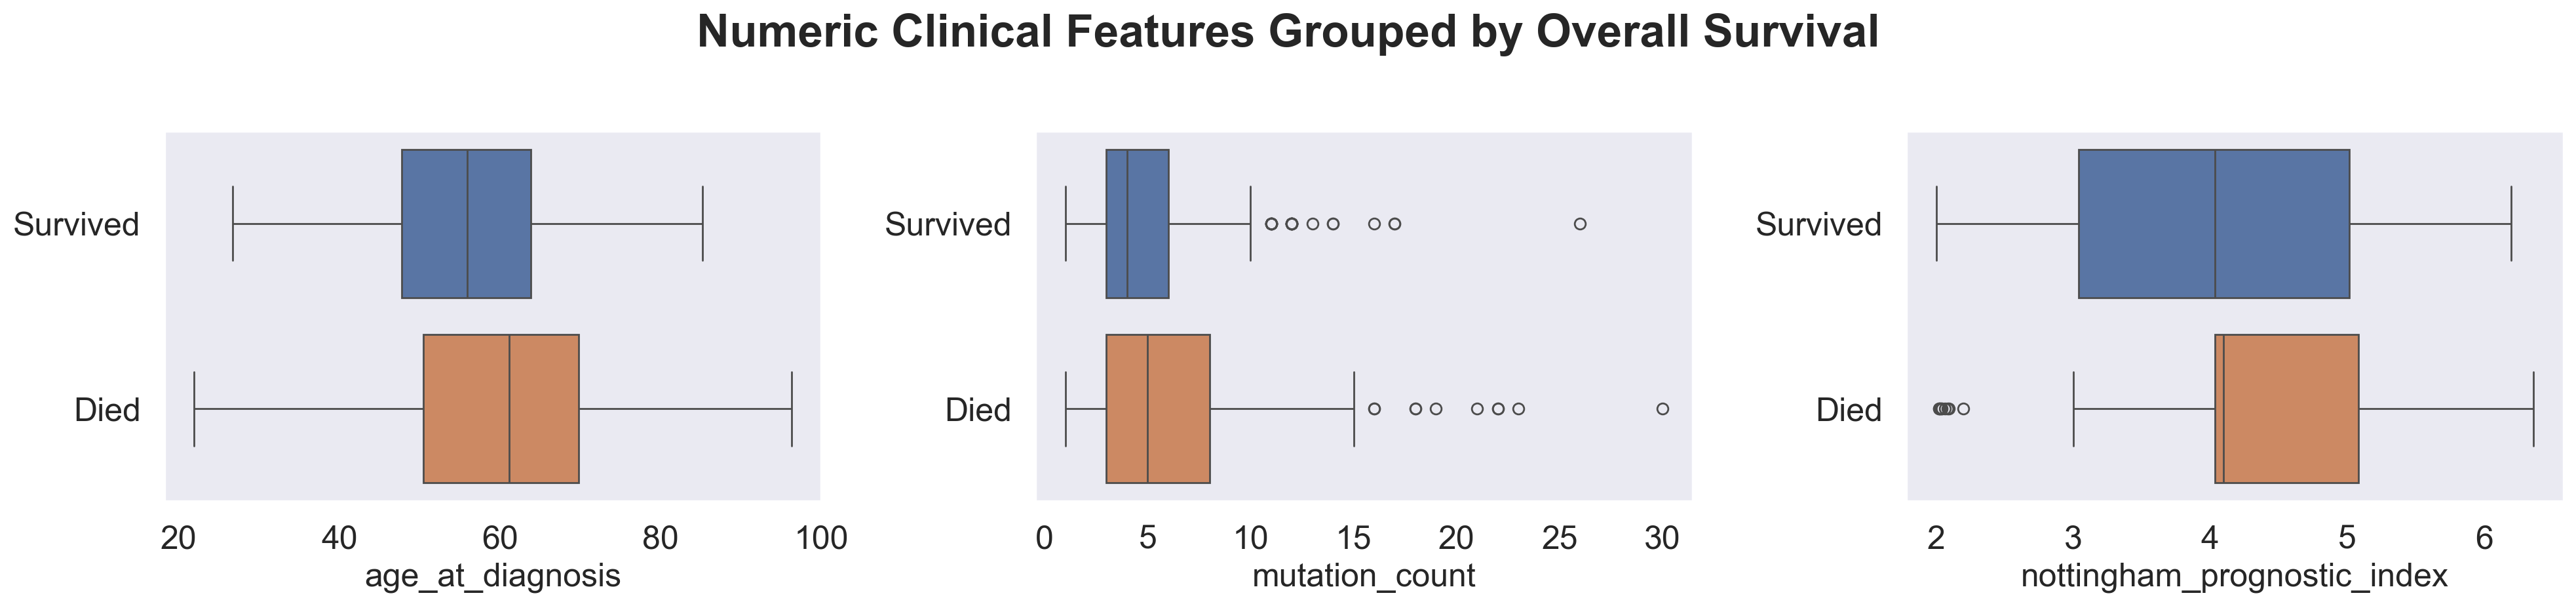

In [18]:
# Box plot
plt.figure(figsize=(20,30))
j = 0

for col in num_col:
    j += 1
    plt.subplot(7, 3, j)
    sns.boxplot(data=data[data['features']==col], x='value', y='survival_label', hue='survival_label')
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.ylabel('')
    plt.legend().set_visible(False) 
    plt.grid(False)
    
fig = plt.gcf()

font_dict = {
    'weight': 'bold',  
    'size': 25
}
fig.suptitle('Numeric Clinical Features Grouped by Overall Survival', **font_dict)
fig.tight_layout()
fig.subplots_adjust(top=0.95, hspace=0.5)
plt.show()

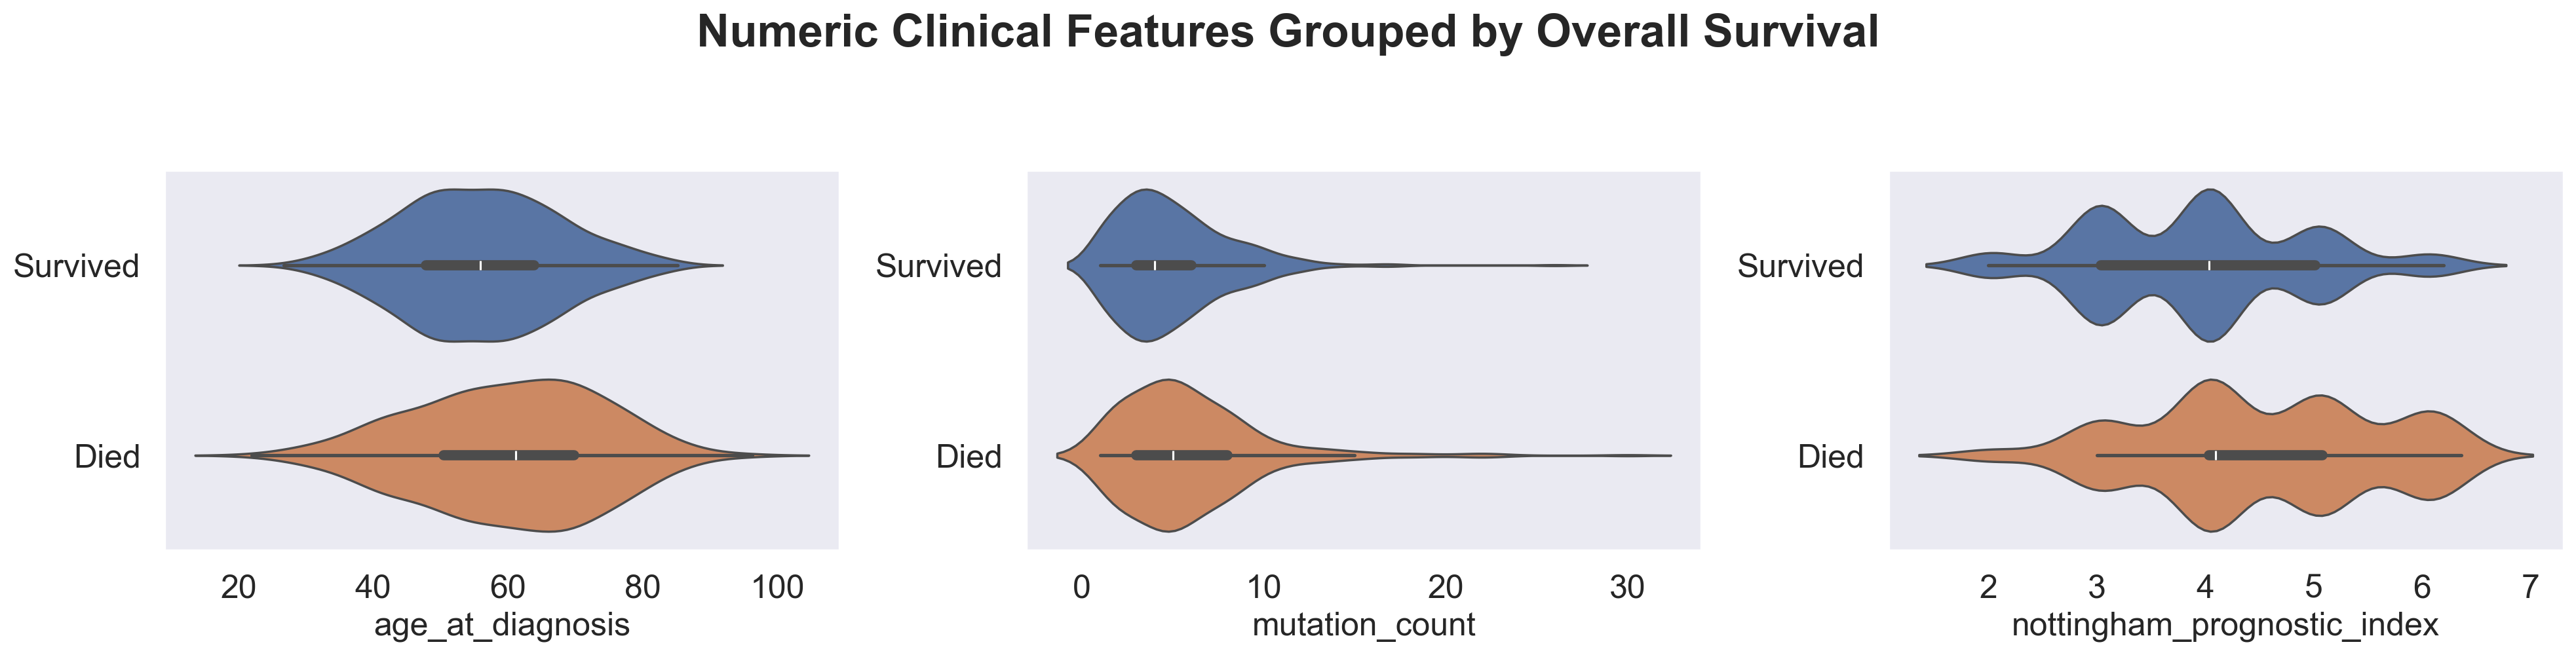

In [19]:
# Violin plot
plt.figure(figsize=(20,40))
j = 0

for col in num_col:
    j += 1
    plt.subplot(9, 3, j)
    sns.violinplot(data=data[data['features']==col], x='value', y='survival_label', hue='survival_label')
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(col, fontsize=18)
    plt.ylabel('')
    plt.legend().set_visible(False) 
    plt.grid(False)
    
fig = plt.gcf()

font_dict = {
    'weight': 'bold',  
    'size': 25
}
fig.suptitle('Numeric Clinical Features Grouped by Overall Survival', **font_dict)
fig.tight_layout()
fig.subplots_adjust(top=0.95, hspace=0.5)
plt.show()

#### Conduct Kolmogorov–Smirnov (K–S) test to investigate if these features have different distribution across overall survival statuses

- Results below shows all three numeric clinical features have significantly different distribution across overall survival statuses

In [20]:
# Kolmogorov–Smirnov (K–S) test
from scipy.stats import stats

def ks_test(fea):
    
    data_S = data[(data['features']==fea)&(data['overall_survival']==1)]
    data_D = data[(data['features']==fea)&(data['overall_survival']==0)]
    
    ks_statistic, p_value = stats.ks_2samp(data_S['value'], data_D['value'])
    
    return ks_statistic, p_value

In [21]:
ks_results = pd.DataFrame(columns = ['Features', 'KS_Statistic', 'P_Value'])
ks_signum = []

for col in num_col:
    ks_statistic, p_value = ks_test(col)
    p_value_sci = '{:.2e}'.format(p_value) 
    
    ks_results = pd.concat([
    ks_results,
    pd.DataFrame([{
        'Features': col,
        'KS_Statistic': round(ks_statistic, 2),
        'P_Value': p_value_sci
    }])
], ignore_index=True)
    
    if p_value < 0.05:
        ks_signum.append(col)
    
print(ks_results)
print("")
print("Numeric clinical features with significantly different distribution across overall survival statuses:")

if ks_signum:
    print(ks_signum)
else:
    print("None")

                      Features  KS_Statistic   P_Value
0             age_at_diagnosis          0.18  1.11e-06
1               mutation_count          0.12  3.84e-03
2  nottingham_prognostic_index          0.28  3.35e-15

Numeric clinical features with significantly different distribution across overall survival statuses:
['age_at_diagnosis', 'mutation_count', 'nottingham_prognostic_index']


#### Conduct Shapiro—Wilk test for normality

- Results below shows all three numeric clinical features are not normally distributed. Therefore, Mann-Whitney U test should be applied rather than t-test.

In [22]:
# Shapiro—Wilk test
from scipy.stats import shapiro

def sw_test(fea):
    
    data_S = data[(data['features']==fea)&(data['overall_survival']==1)]
    data_D = data[(data['features']==fea)&(data['overall_survival']==0)]
    
    sw_statistic_sur, p_value_sur = shapiro(data_S['value'])
    sw_statistic_die, p_value_die = shapiro(data_D['value'])
        
    return sw_statistic_sur, p_value_sur, sw_statistic_die, p_value_die

In [23]:
sw_results = pd.DataFrame(columns = ['Features', 'SW_Statistic_S', 'P_Value_S', 'SW_Statistic_D', 'P_Value_D'])
sw_signum = []

for col in num_col:
    sw_statistic_sur, p_value_sur, sw_statistic_die, p_value_die = sw_test(col)
    p_value_sur_sci = '{:.2e}'.format(p_value_sur)
    p_value_die_sci = '{:.2e}'.format(p_value_die)
    
    sw_results = pd.concat([
        sw_results,
        pd.DataFrame([{
            'Features': col,
            'SW_Statistic_S': round(sw_statistic_sur, 2),
            'P_Value_S': p_value_sur_sci,
            'SW_Statistic_D': round(sw_statistic_die, 2),
            'P_Value_D': p_value_die_sci
        }])
    ], ignore_index=True)

    if (p_value_sur > 0.05) and (p_value_die > 0.05):
        sw_signum(col)
    
print(sw_results)
print("")
print("Numeric clinical features with normal distribution:")

if sw_signum:
    print(sw_signum)
else:
    print("None")

                      Features  SW_Statistic_S P_Value_S  SW_Statistic_D  \
0             age_at_diagnosis            0.99  1.12e-01            0.99   
1               mutation_count            0.89  1.20e-17            0.85   
2  nottingham_prognostic_index            0.91  7.65e-16            0.92   

  P_Value_D  
0  3.76e-02  
1  1.45e-18  
2  2.05e-13  

Numeric clinical features with normal distribution:
None


#### Conduct Mann-Whitney U test to investigate median value difference

- Results below shows all three numeric clinical features have significantly different median value across overall survival statuses.

In [24]:
# Mann-Whitney U test
from scipy.stats import mannwhitneyu

def mw_test(fea):
    
    data_S = data[(data['features']==fea)&(data['overall_survival']==1)]
    data_D = data[(data['features']==fea)&(data['overall_survival']==0)]
    
    mw_statistic, p_value = mannwhitneyu(data_S['value'], data_D['value'])
    
    return mw_statistic, p_value

In [25]:
mw_results = pd.DataFrame(columns = ['Features', 'MW_Statistic', 'P_Value'])
mw_signum = []

for col in num_col:
    mw_statistic, p_value = mw_test(col)
    p_value_sci = '{:.2e}'.format(p_value) 
    
    mw_results = pd.concat([
        mw_results,
        pd.DataFrame([{
            'Features': col,
            'MW_Statistic': '{:.2e}'.format(mw_statistic),
            'P_Value': p_value_sci
        }]), 
    ], ignore_index=True)
    
    if p_value < 0.05:
        mw_signum.append(col)
    
print(mw_results)
print("")
print("Numeric clinical features with significantly different median value across overall survival statuses:")

if mw_signum:
    print(mw_signum)
else:
    print("None")

                      Features MW_Statistic   P_Value
0             age_at_diagnosis     7.14e+04  1.17e-06
1               mutation_count     7.65e+04  6.00e-04
2  nottingham_prognostic_index     5.73e+04  9.95e-19

Numeric clinical features with significantly different median value across overall survival statuses:
['age_at_diagnosis', 'mutation_count', 'nottingham_prognostic_index']


### Categorical clinical features

In [26]:
categor_df = clinical_df.drop(num_col, axis=1)
categorical_df = categor_df.drop('overall_survival', axis=1)
categorical_df = pd.concat([categorical_df, categor_df['overall_survival']], axis=1)
categor_df

type_of_breast_surgery cancer_type_detailed cellularity  chemotherapy  \
1         BREAST CONSERVING                  IDC        High             0   
4                MASTECTOMY                 MDLC        High             1   
5                MASTECTOMY                  IDC    Moderate             0   
9                MASTECTOMY                  ILC        High             0   
10               MASTECTOMY                  IDC    Moderate             0   
...                     ...                  ...         ...           ...   
1613             MASTECTOMY                  IDC        High             0   
1616             MASTECTOMY                  IDC        High             0   
1619      BREAST CONSERVING                 MDLC        High             0   
1623      BREAST CONSERVING                 MDLC        High             1   
1664      BREAST CONSERVING                 IMMC        High             0   

     pam50_+_claudin-low_subtype er_status_measured_by_ihc er_status  \
1                           LumA                   Positve  Positive   
4                           LumB                   Positve  Positive   
5                           LumB                   Positve  Positive   
9                           Her2                  Negative  Positive   
10                          LumA                   Positve  Positive   
...                          ...                       ...       ...   
1613                        LumA                   Positve  Positive   
1616                        LumA                   Positve  Positive   
1619                        LumB                   Positve  Positive   
1623                      Normal                   Positve  Positive   
1664                        LumB                   Positve  Positive   

      neoplasm_histologic_grade her2_status_measured_by_snp6 her2_status  \
1                           3.0                      NEUTRAL    Negative   
4                           3.0                      NEUTRAL    Negative   
5                           3.0                      NEUTRAL    Negative   
9                           2.0                         LOSS    Negative   
10                          2.0                      NEUTRAL    Negative   
...                         ...                          ...         ...   
1613                        2.0                      NEUTRAL    Negative   
1616                        1.0                      NEUTRAL    Negative   
1619                        1.0                      NEUTRAL    Negative   
1623                        2.0                      NEUTRAL    Negative   
1664                        2.0                      NEUTRAL    Negative   

     tumor_other_histologic_subtype  hormone_therapy  \
1                        Ductal/NST                1   
4                             Mixed                1   
5                        Ductal/NST                1   
9                           Lobular                0   
10                       Ductal/NST                1   
...                             ...              ...   
1613                     Ductal/NST                0   
1616                     Ductal/NST                0   
1619                          Mixed                0   
1623                          Mixed                0   
1664                       Mucinous                0   

     inferred_menopausal_state integrative_cluster primary_tumor_laterality  \
1                          Pre                4ER+                    Right   
4                         Post                   9                    Right   
5                         Post                   7                     Left   
9                         Post                   3                     Left   
10                        Post                   3                     Left   
...                        ...                 ...                      ...   
1613                      Post                   7              

In [27]:
# Capitalize the dataFrame
cap_categor_df = categorical_df
unchanged = ['pam50_+_claudin-low_subtype', 'tumor_other_histologic_subtype', 'integrative_cluster', 'cancer_type_detailed', '3-gene_classifier_subtype']

for col in cap_categor_df.select_dtypes(include=['object']).columns:
    if col not in unchanged:
        cap_categor_df[col] = cap_categor_df[col].str.capitalize()
    
cap_categor_df.head()

type_of_breast_surgery cancer_type_detailed cellularity  chemotherapy  \
1       Breast conserving                  IDC        High             0   
4              Mastectomy                 MDLC        High             1   
5              Mastectomy                  IDC    Moderate             0   
9              Mastectomy                  ILC        High             0   
10             Mastectomy                  IDC    Moderate             0   

   pam50_+_claudin-low_subtype er_status_measured_by_ihc er_status  \
1                         LumA                   Positve  Positive   
4                         LumB                   Positve  Positive   
5                         LumB                   Positve  Positive   
9                         Her2                  Negative  Positive   
10                        LumA                   Positve  Positive   

    neoplasm_histologic_grade her2_status_measured_by_snp6 her2_status  \
1                         3.0                      Neutral    Negative   
4                         3.0                      Neutral    Negative   
5                         3.0                      Neutral    Negative   
9                         2.0                         Loss    Negative   
10                        2.0                      Neutral    Negative   

   tumor_other_histologic_subtype  hormone_therapy inferred_menopausal_state  \
1                      Ductal/NST                1                       Pre   
4                           Mixed                1                      Post   
5                      Ductal/NST                1                      Post   
9                         Lobular                0                      Post   
10                     Ductal/NST                1                      Post   

   integrative_cluster primary_tumor_laterality pr_status  radio_therapy  \
1                 4ER+                    Right  Positive              1   
4                    9                    Right  Positive              1   
5                    7                     Left  Positive              1   
9                    3                     Left  Negative              0   
10                   3                     Left  Positive              1   

   3-gene_classifier_subtype  tumor_stage  overall_survival  
1      ER+/HER2- High Prolif          1.0                 1  
4      ER+/HER2- High Prolif          2.0                 0  
5      ER+/HER2- High Prolif          4.0                 0  
9      ER+/HER2- High Prolif          2.0                 0  
10      ER+/HER2- Low Prolif          4.0                 0

In [28]:
data = cap_categor_df.groupby('type_of_breast_surgery')['overall_survival'].value_counts().unstack()
data

overall_survival          0    1
type_of_breast_surgery          
Breast conserving       125  249
Mastectomy              245  230

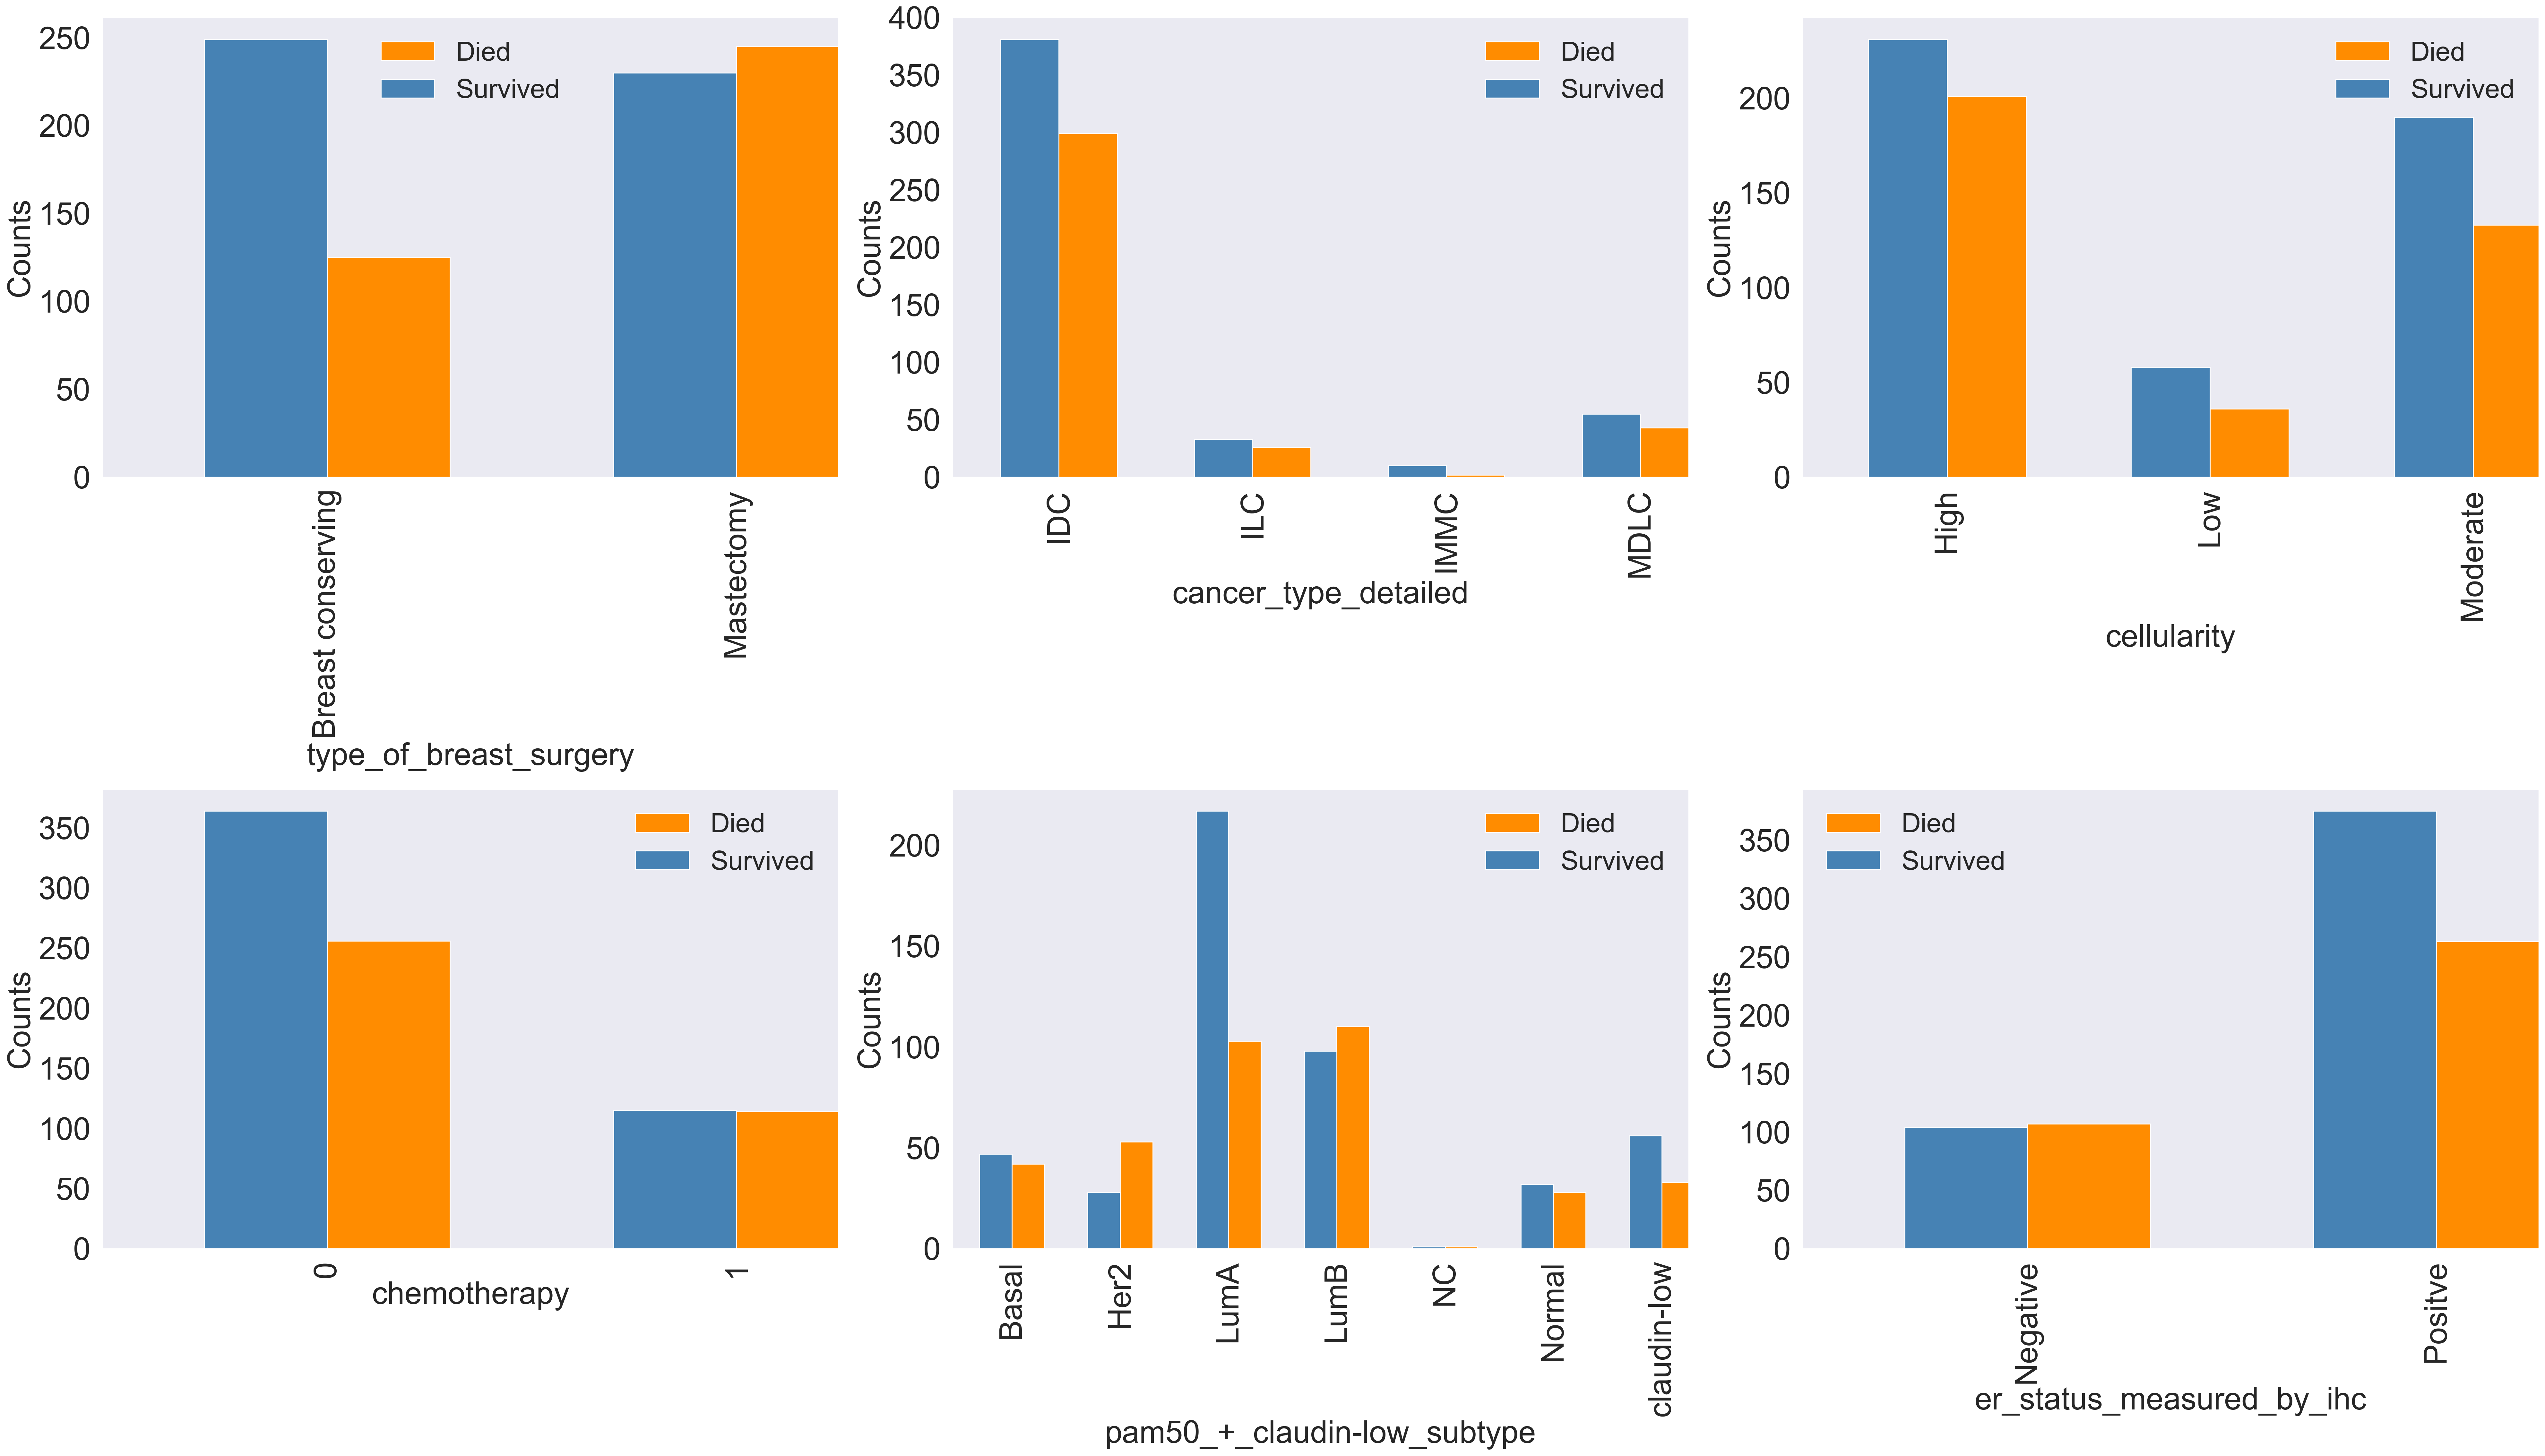

In [29]:
# Countplot
color = ["darkorange", "steelblue"]

fig = plt.figure(figsize=(40, 80))
j = 0

for col in cap_categor_df.iloc[:, 0:6].columns:
    ax = plt.subplot(7, 3, j + 1)
    j += 1
  
    data = cap_categor_df.groupby(col)['overall_survival'].value_counts().unstack()
    
    data[0].plot(kind='bar', position=0, ax=ax, color=color[0], width=0.3, label='Died')
    data[1].plot(kind='bar', position=1, ax=ax, color=color[1], width=0.3, label='Survived')
    
    ax.set_xlabel(col, size=35)
    ax.set_ylabel('Counts', size=35)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=35)
    ax.set_yticklabels(ax.get_yticklabels(), size=35)
    
    ax.legend(fontsize=30, loc='best')
    ax.grid(False)
    
plt.tight_layout()

In [30]:
data = cap_categor_df.groupby('type_of_breast_surgery')['overall_survival'].value_counts().unstack()
total_counts = data.sum(axis=1) 
data_ratio = data.div(total_counts, axis=0)
data_ratio

overall_survival               0         1
type_of_breast_surgery                    
Breast conserving       0.334225  0.665775
Mastectomy              0.515789  0.484211

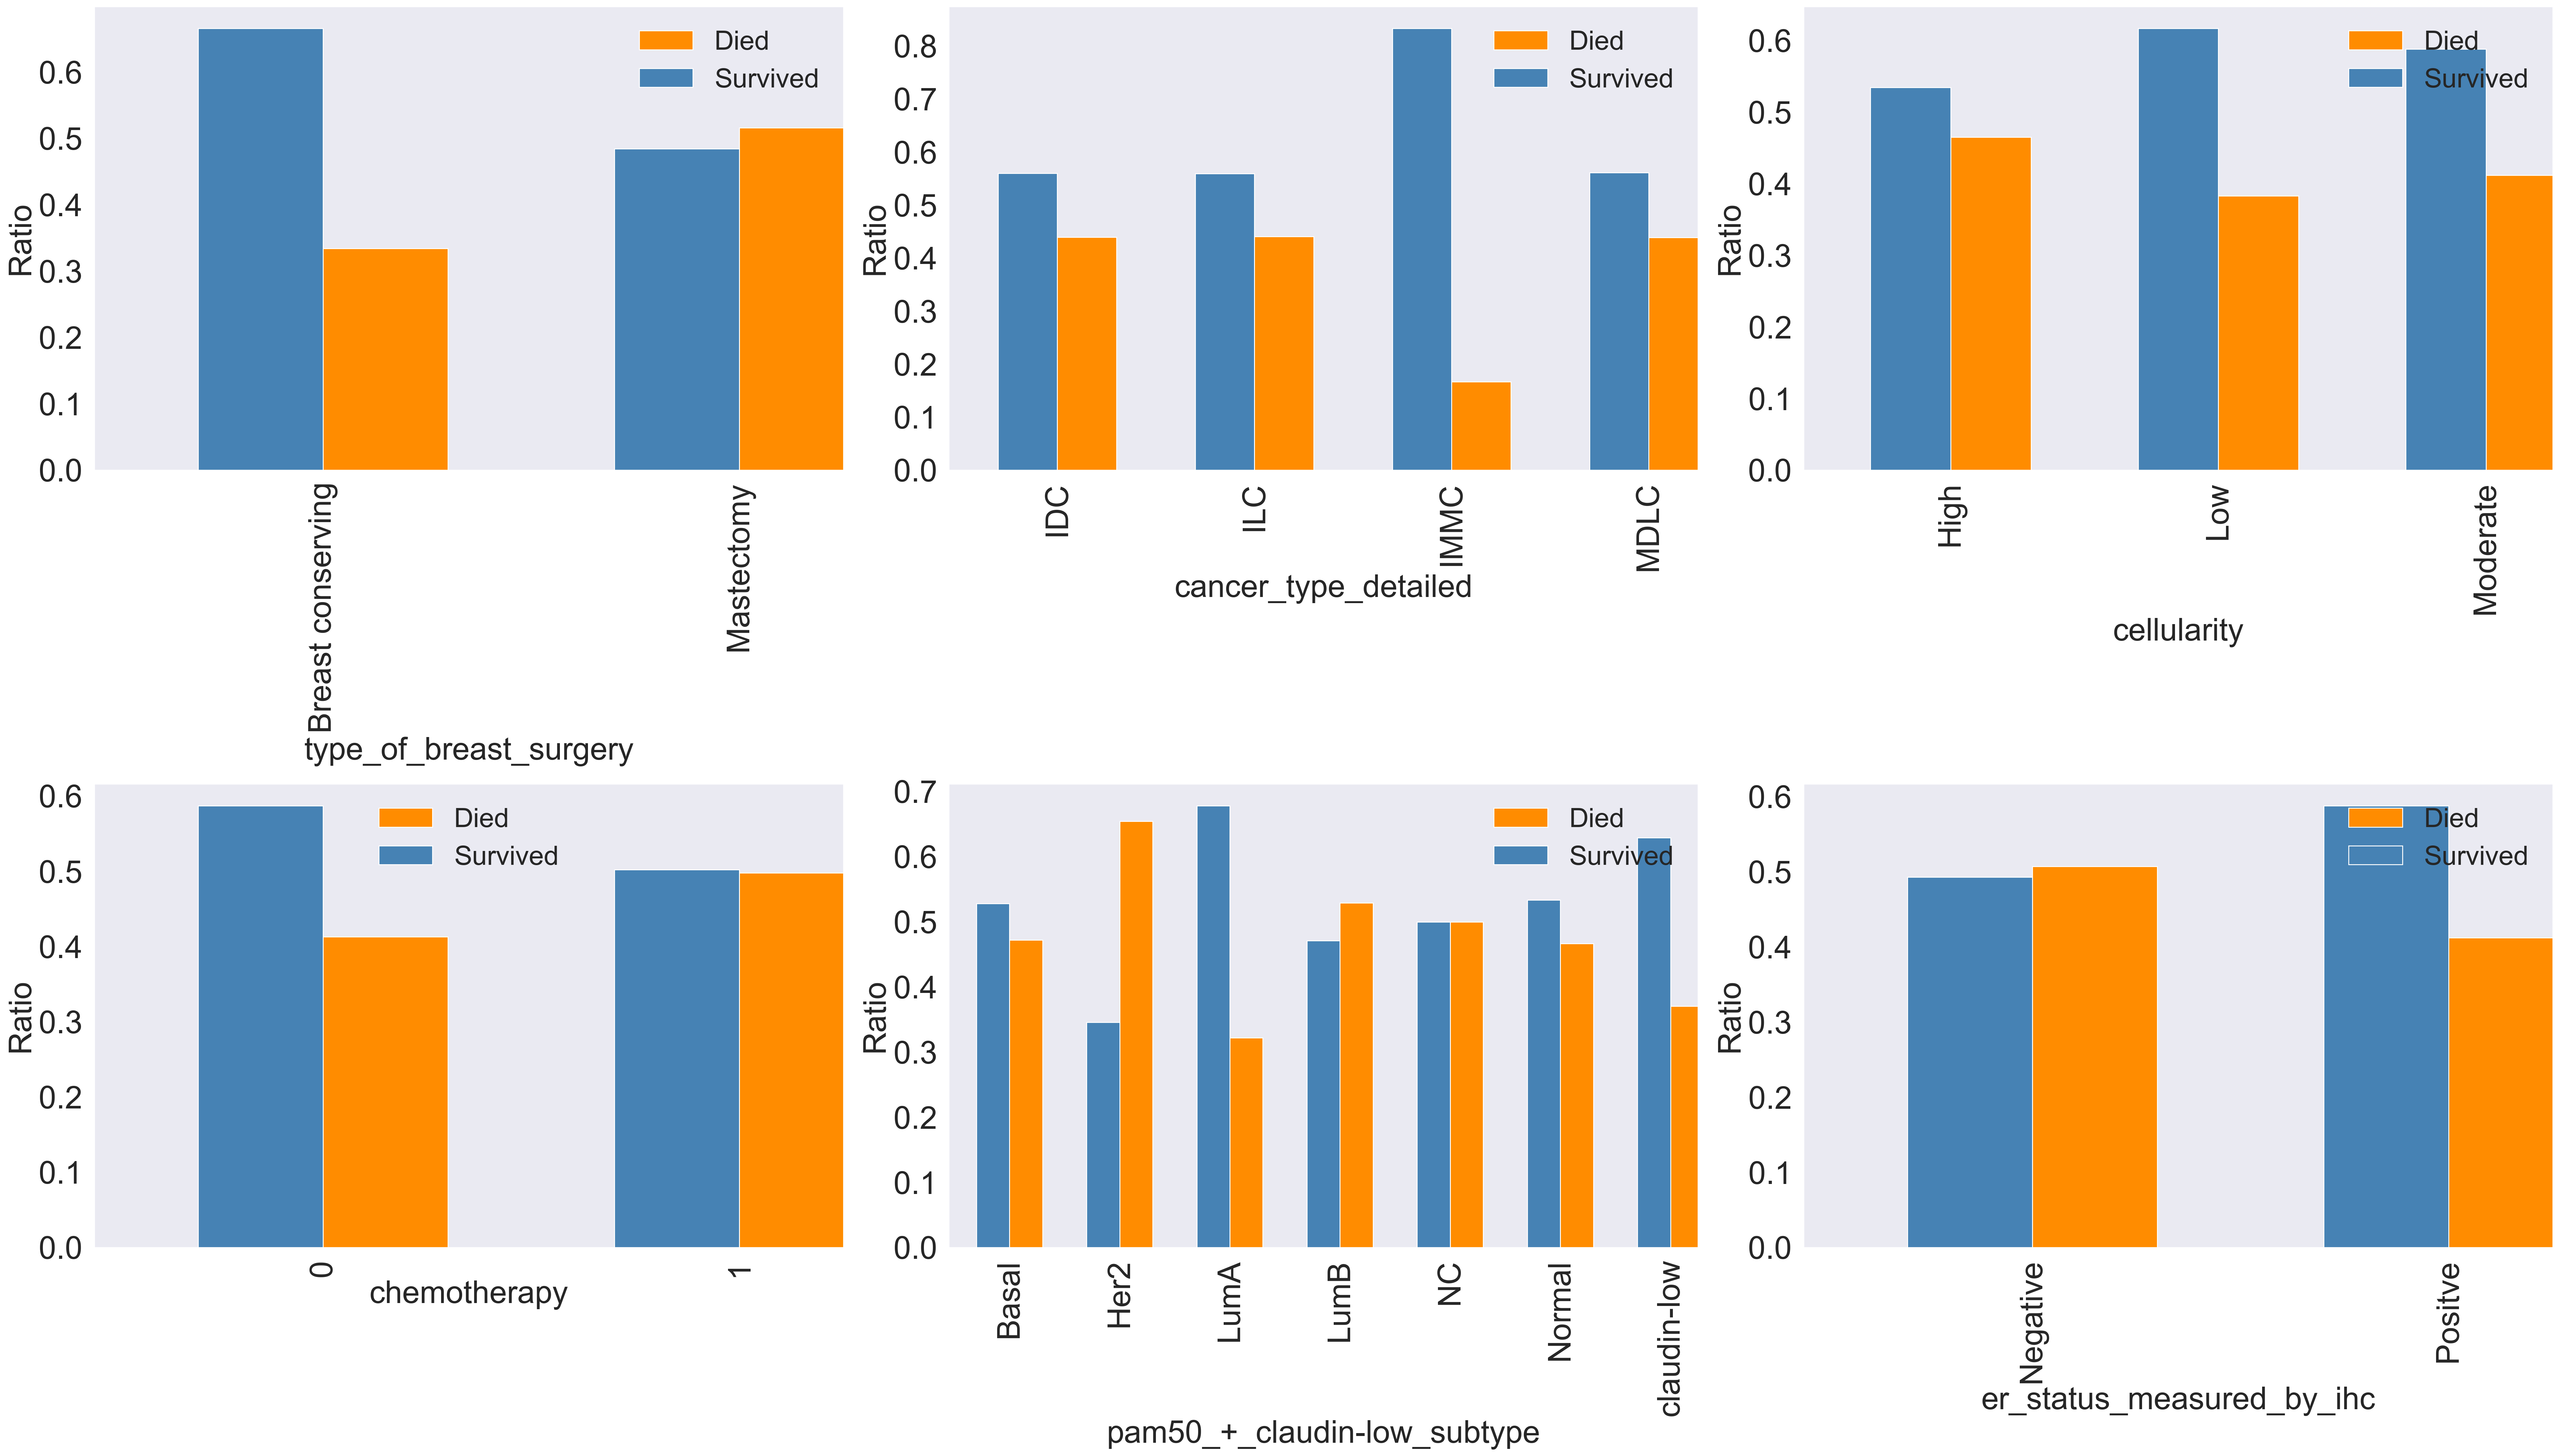

In [31]:
## Ratio
fig = plt.figure(figsize=(40, 80))
j = 0

for col in cap_categor_df.iloc[:, 0:6].columns:
    ax = plt.subplot(7, 3, j + 1)
    j += 1
  
    data = cap_categor_df.groupby(col)['overall_survival'].value_counts().unstack()
    
    total_counts = data.sum(axis=1) 
    data_ratio = data.div(total_counts, axis=0) 
    
    data_ratio[0].plot(kind='bar', position=0, ax=ax, color=color[0], width=0.3, label='Died')
    data_ratio[1].plot(kind='bar', position=1, ax=ax, color=color[1], width=0.3, label='Survived')
    
    ax.set_xlabel(col, size=35)
    ax.set_ylabel('Ratio', size=35)  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=35)
    ax.set_yticklabels(ax.get_yticklabels(), size=35)
    
    ax.legend(fontsize=30, loc='best')
    ax.grid(False)
    
plt.tight_layout()

#### Conduct Chi square test to test distribution varity of categorical features 

- Results below shows that there are 16 categorical clinical features in total that have significantly different distribution across overall survival statuses

In [32]:
# Chi square test
from scipy.stats import chi2_contingency

def chi_test(fea):
    
    contingency_table = pd.crosstab(cap_categor_df[fea], cap_categor_df['overall_survival'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    return chi2, p_value, dof, expected

In [33]:
categor_df = cap_categor_df.drop('overall_survival', axis=1)

cat_chi_results = pd.DataFrame(columns=['Features', 'Chi2', 'P_value'])
significant_categories = []
i = 0

for col in categor_df.columns:
    chi2, p_value, dof, expected = chi_test(col)
    p_value_sci = '{:.2e}'.format(p_value)
    
    cat_chi_results = pd.concat([
        cat_chi_results,
        pd.DataFrame([{
            'Features': col,
            'Chi2': round(chi2, 2),
            'P_value': p_value_sci
        }])
    ], ignore_index=True)
    
    if p_value < 0.05:
        significant_categories.append(col)
        i += 1
        
print(cat_chi_results)
print("")
print("Number of categorical clinical features with significant p-values:", i)
print("")
print("Features with significant p-values:", significant_categories)

                          Features   Chi2   P_value
0           type_of_breast_surgery  27.32  1.72e-07
1             cancer_type_detailed   3.59  3.10e-01
2                      cellularity   3.35  1.87e-01
3                     chemotherapy   4.56  3.26e-02
4      pam50_+_claudin-low_subtype  42.21  1.67e-07
5        er_status_measured_by_ihc   5.43  1.98e-02
6                        er_status   4.65  3.11e-02
7        neoplasm_histologic_grade  19.96  4.63e-05
8     her2_status_measured_by_snp6  12.07  7.14e-03
9                      her2_status  15.32  9.09e-05
10  tumor_other_histologic_subtype  13.35  2.03e-02
11                 hormone_therapy   0.00  9.73e-01
12       inferred_menopausal_state   4.97  2.57e-02
13             integrative_cluster  45.10  2.08e-06
14        primary_tumor_laterality   4.03  4.48e-02
15                       pr_status   8.27  4.04e-03
16                   radio_therapy   5.20  2.26e-02
17       3-gene_classifier_subtype  44.68  1.08e-09
18          

## Gene columns

In [34]:
df_dp.columns.get_loc('pik3ca_mut')

512

In [35]:
mutation_col = df_dp.columns[512:]

gene_df = df_dp.drop(clinical_df.columns, axis=1)
gene_df = gene_df.drop(mutation_col, axis=1)
gene_df

brca1   brca2   palb2    pten    tp53     atm    cdh1   chek2     nbn  \
1    -1.3800  0.2777 -1.2154  0.5296 -0.0136 -0.2659  1.3594  0.7961  0.5419   
4     1.2932 -0.9039 -0.7219  0.2168  0.3484  0.3897  0.9131  0.9356  0.7675   
5    -0.4341  0.6931  0.6909  1.0840 -1.9371  0.9252  1.1520  0.7951 -0.9677   
9    -1.0087 -0.6074  0.0313  1.0975  0.5314  0.9105 -1.5068 -0.0196  0.3726   
10   -0.4601 -0.2692 -0.7247 -0.6742 -0.6333 -0.6192  0.2709 -0.4980  1.2944   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1613  0.0397  0.7002 -0.6513 -0.6873 -0.5098 -0.8756 -0.5237  1.1626 -0.1726   
1616 -1.0520  2.3258  0.4966 -0.9795  0.1319 -1.9487 -0.2028 -0.3374  1.4109   
1619 -0.4151 -0.2158 -0.2229  0.6256  0.1746  2.0361  0.1095  0.1703  0.4698   
1623 -0.5892  0.0127  0.5310  0.6685  0.7391 -0.0885 -0.5507  0.2998 -0.1456   
1664 -0.0512  0.3848 -0.4616 -1.3601 -0.6177 -0.5362 -0.1910 -1.4707  0.8071   

         nf1  ...  srd5a1  srd5a2  srd5a3     st7    star    tnk2   tulp4  \
1    -2.6059  ... -0.4412  0.4534  0.4068  0.7634  0.0231  0.9121 -0.9538   
4    -0.2940  ... -0.5845 -0.3544 -1.0150  2.2961  0.1817 -0.1572  0.0427   
5    -0.7750  ... -0.3910  0.0395  0.8191  0.1977 -0.2302 -0.5092 -0.3021   
9     0.4892  ... -0.3020 -0.4788  3.6125  1.9925  0.2253 -0.8414  1.7093   
10    0.1006  ... -0.3674 -0.2437 -0.6415  0.3603  1.8962  0.2654  0.7365   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
1613 -0.2473  ... -0.3958  0.6497 -0.2101  0.8628 -0.0545  0.9838 -0.5920   
1616  3.1759  ... -0.1375  0.1738 -0.7008 -0.1484 -0.5645  1.2270  0.1641   
1619  0.6346  ... -0.8087 -2.2898  0.7959  0.5885 -0.5030 -0.2028  0.1612   
1623  0.1503  ... -0.0440  0.0102 -0.2031 -0.0867 -1.5902  0.4162 -0.1676   
1664 -0.5439  ...  0.3329 -0.5784  0.2908  0.6721  0.0957 -1.3143  0.2407   

      ugt2b15  ugt2b17  ugt2b7  
1     -0.2264   0.5398 -0.8920  
4      5.0048   3.8476  1.3223  
5      0.9357  -0.4217  0.5340  
9     -0.6921   0.6906 -0.8006  
10    -0.5583  -0.9771 -0.8858  
...       ...      ...     ...  
1613  -0.2465   0.1823  0.4346  
1616  -0.2781   0.0359 -0.8673  
1619  -0.7089  -0.9014 -0.6310  
1623  -0.0993  -0.5916 -0.8837  
1664  -0.5211  -0.6152 -0.3663  

[849 rows x 489 columns]

In [36]:
genetic_df = pd.concat([gene_df, df_dp['overall_survival']], axis=1)
genetic_df.head()

brca1   brca2   palb2    pten    tp53     atm    cdh1   chek2     nbn  \
1  -1.3800  0.2777 -1.2154  0.5296 -0.0136 -0.2659  1.3594  0.7961  0.5419   
4   1.2932 -0.9039 -0.7219  0.2168  0.3484  0.3897  0.9131  0.9356  0.7675   
5  -0.4341  0.6931  0.6909  1.0840 -1.9371  0.9252  1.1520  0.7951 -0.9677   
9  -1.0087 -0.6074  0.0313  1.0975  0.5314  0.9105 -1.5068 -0.0196  0.3726   
10 -0.4601 -0.2692 -0.7247 -0.6742 -0.6333 -0.6192  0.2709 -0.4980  1.2944   

       nf1  ...  srd5a2  srd5a3     st7    star    tnk2   tulp4  ugt2b15  \
1  -2.6059  ...  0.4534  0.4068  0.7634  0.0231  0.9121 -0.9538  -0.2264   
4  -0.2940  ... -0.3544 -1.0150  2.2961  0.1817 -0.1572  0.0427   5.0048   
5  -0.7750  ...  0.0395  0.8191  0.1977 -0.2302 -0.5092 -0.3021   0.9357   
9   0.4892  ... -0.4788  3.6125  1.9925  0.2253 -0.8414  1.7093  -0.6921   
10  0.1006  ... -0.2437 -0.6415  0.3603  1.8962  0.2654  0.7365  -0.5583   

    ugt2b17  ugt2b7  overall_survival  
1    0.5398 -0.8920                 1  
4    3.8476  1.3223                 0  
5   -0.4217  0.5340                 0  
9    0.6906 -0.8006                 0  
10  -0.9771 -0.8858                 0  

[5 rows x 490 columns]

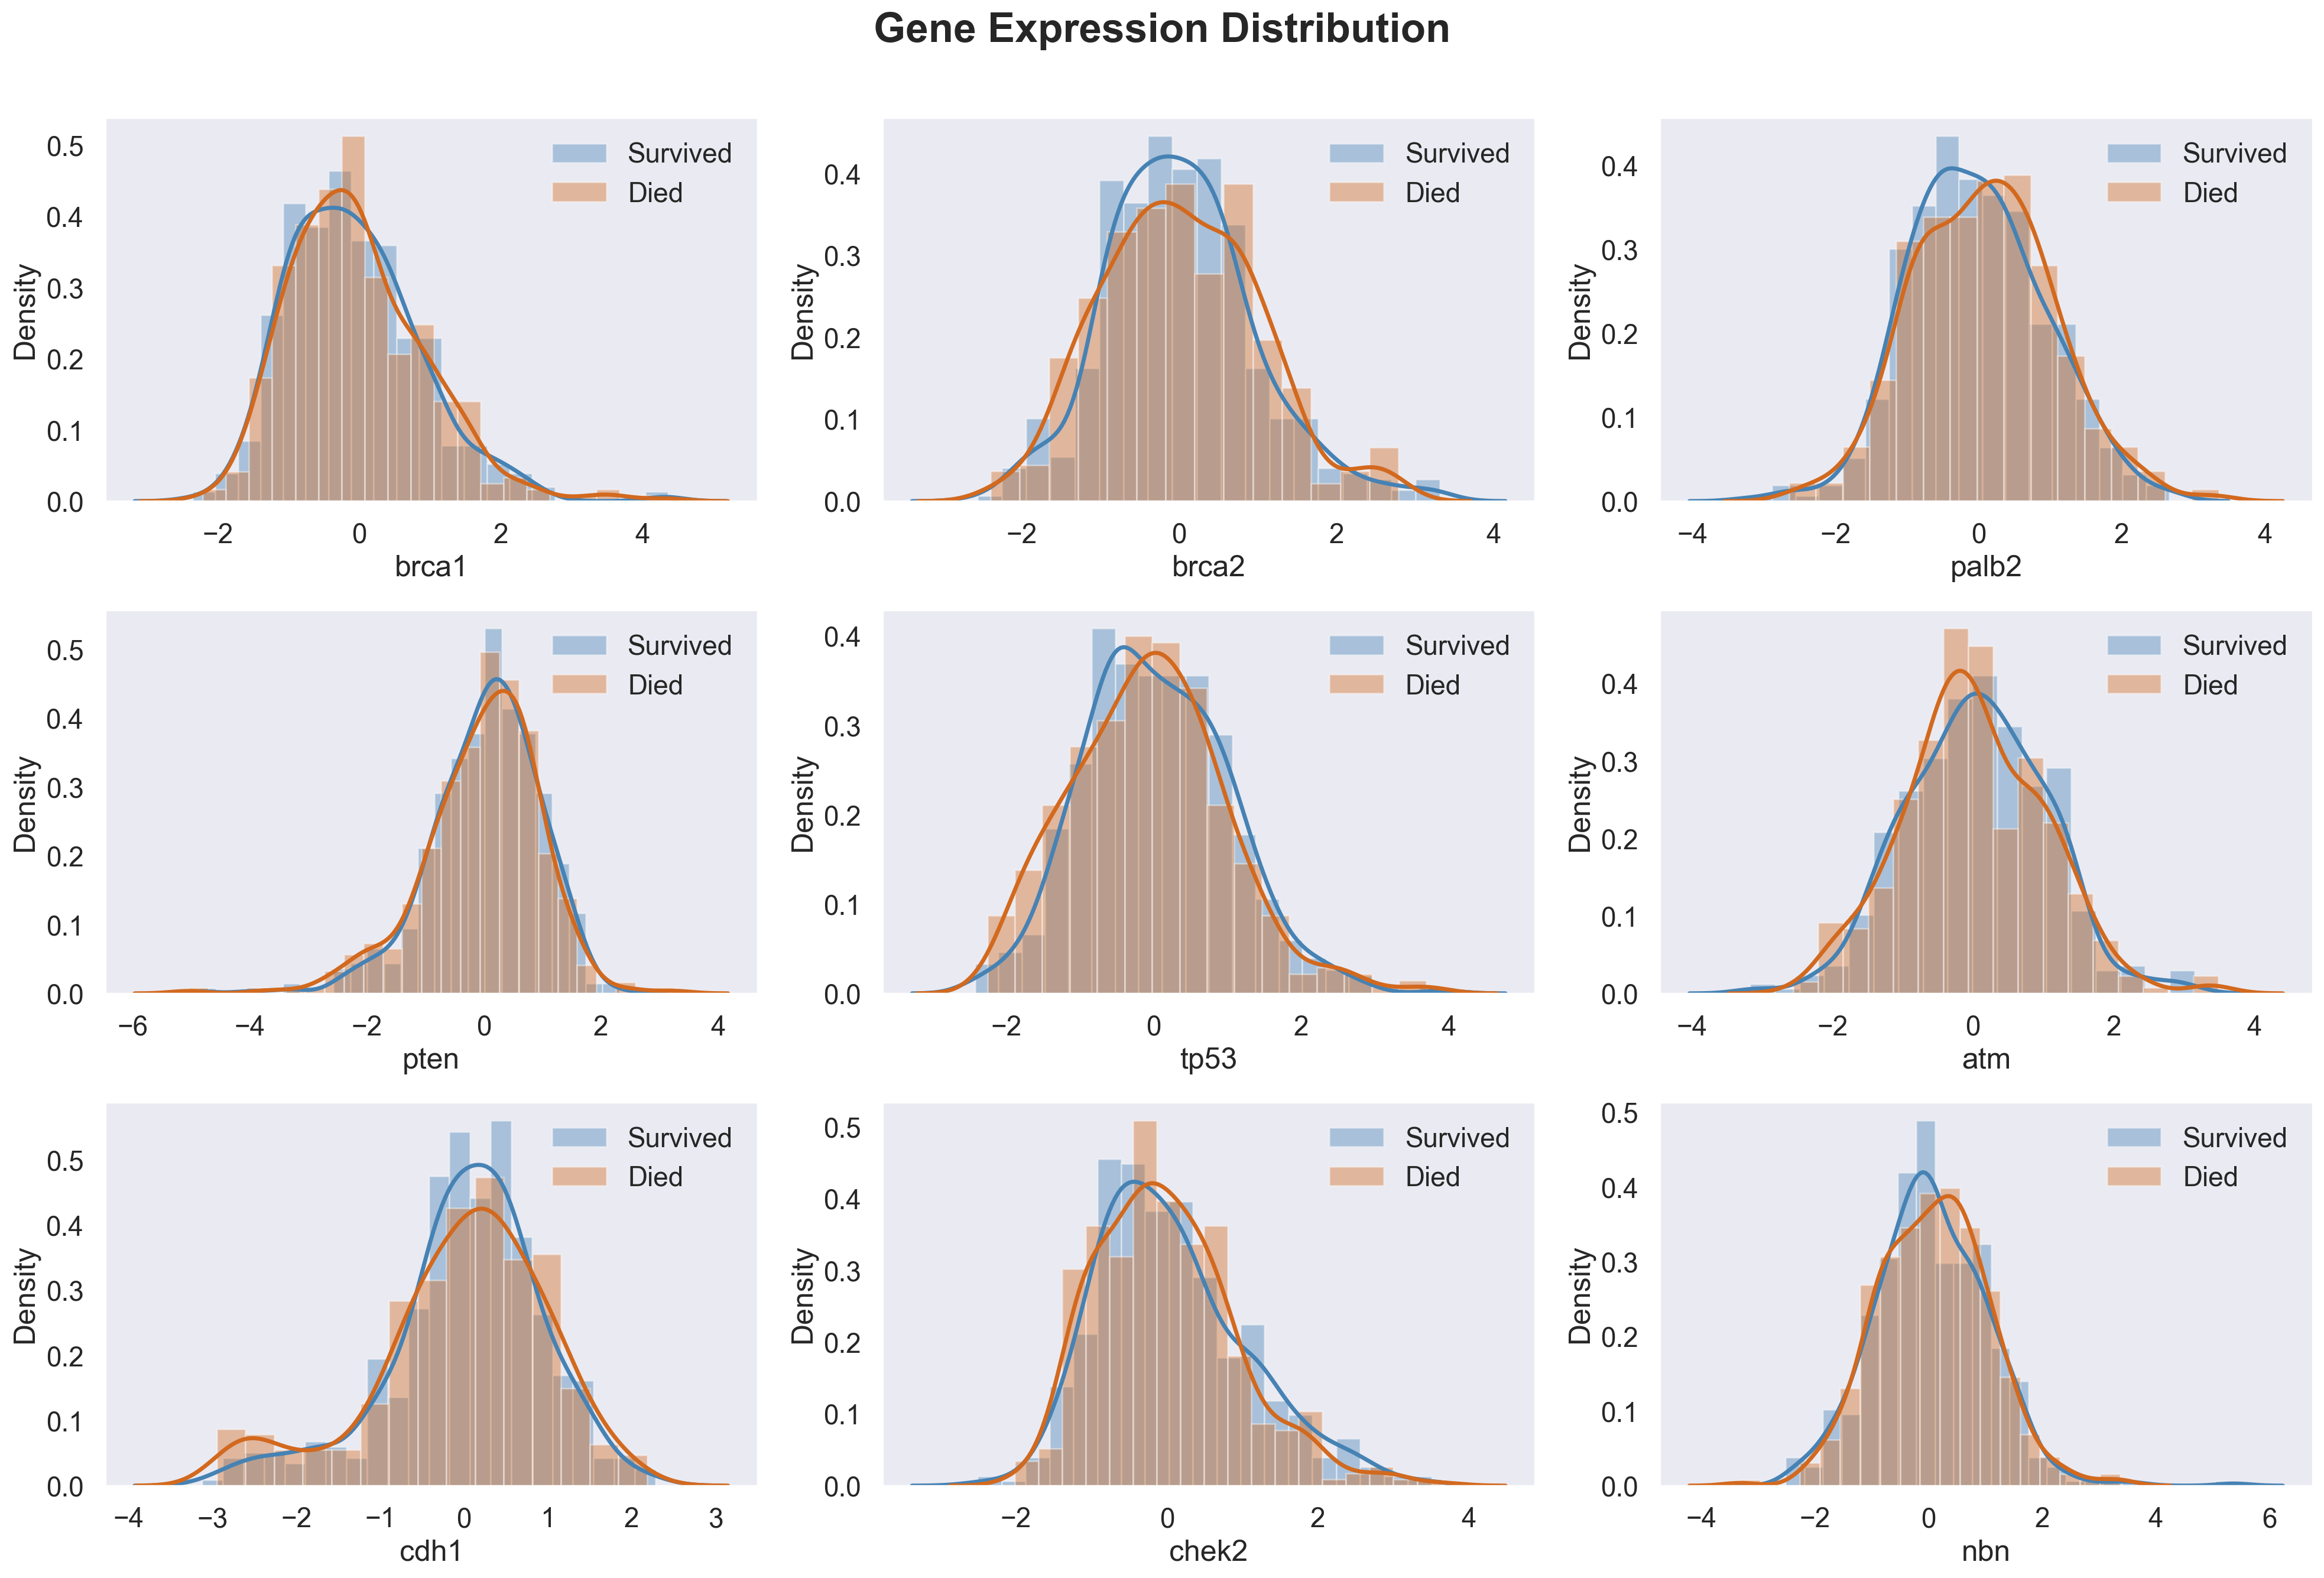

In [37]:
# Distplot
fig = plt.figure(figsize=(20,30))
j = 0

for col in gene_df.iloc[:,0:9].columns:
    plt.subplot(7, 3, j+1)
    j += 1
    
    sns.distplot(genetic_df[col][genetic_df['overall_survival']==1], color=s, label = 'Survived', kde_kws={'linewidth': 2.5})
    sns.distplot(genetic_df[col][genetic_df['overall_survival']==0], color=d, label = 'Died', kde_kws={'linewidth': 2.5})
    
    plt.legend(loc='best')
    plt.grid(False)
    
font_dict = {
    'weight': 'bold',  
    'size': 25
}
fig.suptitle('Gene Expression Distribution', **font_dict)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [38]:
data = pd.melt(genetic_df, id_vars='overall_survival',
                           var_name='genes',
                           value_name='expression')

data['survival_label'] = data['overall_survival'].map({0: 'Died', 1: 'Survived'})
data.head()

overall_survival  genes  expression survival_label
0                 1  brca1     -1.3800       Survived
1                 0  brca1      1.2932           Died
2                 0  brca1     -0.4341           Died
3                 0  brca1     -1.0087           Died
4                 0  brca1     -0.4601           Died

#### Conduct Shapiro—Wilk test for normality

- Only 65 genes have normally distributed expression that can be further analyzed by t-test for distribution difference. On the other hand, Mann-Whitney U test should be applied to the rest of genes.

In [39]:
# Shapiro—Wilk test
def sw_test(gen):
    
    data_S = data[(data['genes']==gen)&(data['overall_survival']==1)]
    data_D = data[(data['genes']==gen)&(data['overall_survival']==0)]
    
    sw_statistic_sur, p_value_sur = shapiro(data_S['expression'])
    sw_statistic_die, p_value_die = shapiro(data_D['expression'])

    return sw_statistic_sur, p_value_sur, sw_statistic_die, p_value_die

In [40]:
sw_results = pd.DataFrame(columns = ['Genes', 'SW_Statistic_S', 'P_Value_S', 'SW_Statistic_D', 'P_Value_D'])
sw_normal = []
i = 0

for gen in gene_df.columns:
    sw_statistic_sur, p_value_sur, sw_statistic_die, p_value_die = sw_test(gen)
    p_value_sur_sci = '{:.2e}'.format(p_value_sur)
    p_value_die_sci = '{:.2e}'.format(p_value_die)
    
    sw_results = pd.concat([
        sw_results,
        pd.DataFrame([{
            'Genes': gen,
            'SW_Statistic_S': round(sw_statistic_sur, 2),
            'P_Value_S': p_value_sur_sci,
            'SW_Statistic_D': round(sw_statistic_die, 2),
            'P_Value_D': p_value_die_sci}])
    ], ignore_index=True)

    if (p_value_sur > 0.05) and (p_value_die > 0.05):
        sw_normal.append(gen)
        i += 1
        
print(sw_results)
print("")
print("Number of genes with normally distributed expression:", i)
print("Genes with normally distributed expression:")

if sw_normal:
    print(sw_normal)
else:
    print("None")

       Genes  SW_Statistic_S P_Value_S  SW_Statistic_D P_Value_D
0      brca1            0.97  5.33e-09            0.96  1.76e-08
1      brca2            0.98  2.12e-05            0.99  1.45e-02
2      palb2            0.99  9.47e-02            1.00  5.51e-01
3       pten            0.96  1.48e-09            0.96  4.46e-08
4       tp53            0.99  2.57e-02            0.98  6.27e-04
..       ...             ...       ...             ...       ...
484     tnk2            1.00  5.64e-01            1.00  7.39e-01
485    tulp4            0.98  3.51e-05            1.00  4.31e-01
486  ugt2b15            0.70  2.38e-28            0.65  6.38e-27
487  ugt2b17            0.68  2.98e-29            0.82  5.85e-20
488   ugt2b7            0.80  1.29e-23            0.82  3.07e-20

[489 rows x 5 columns]

Number of genes with normally distributed expression: 65
Genes with normally distributed expression:
['palb2', 'atm', 'bard1', 'rad50', 'rb1', 'myc', 'cdkn1b', 'e2f1', 'stat2', 'cir1', 'dll4', 'e

#### Conduct t-test for normally distributed features

- Among normally distributed genes, only 21 genes have significantly different distribution across overall survival statuses.

In [41]:
# t-test
from scipy.stats import ttest_ind

norm_genes = sw_normal

def t_test(gen):
    
    died_expression = genetic_df[gen][genetic_df['overall_survival']==0]
    survived_expression = genetic_df[gen][genetic_df['overall_survival']==1]
    
    t_statistic, p_value = ttest_ind(died_expression, survived_expression, equal_var=False)
    
    return t_statistic, p_value

In [42]:
ttest_results = pd.DataFrame(columns=['Genes', 'T-Statistic', 'P-Value'])
significant_ttest = []
i = 0

for gene in norm_genes:
    t_statistic, p_value = t_test(gene)
    p_value_sci = "{:.2e}".format(p_value)
    
    ttest_results = pd.concat([
        ttest_results,
        pd.DataFrame([{
            'Genes': gene,
            'T-Statistic': round(t_statistic, 2),
            'P-Value': p_value_sci
        }])
    ], ignore_index=True)

    if p_value < 0.05:
        significant_ttest.append(gene)
        i = i + 1
        
print(ttest_results)
print("")
print("Number of genes with significantly different distribution:", i)
print("Genes with significant p-values (< 0.05):")

if significant_ttest:
    print(significant_ttest)
else:
    print('None')

       Genes  T-Statistic   P-Value
0      palb2         1.50  1.34e-01
1        atm        -0.56  5.74e-01
2      bard1         4.82  1.69e-06
3      rad50         0.80  4.27e-01
4        rb1        -2.61  9.26e-03
..       ...          ...       ...
60   cyp3a43         0.26  7.91e-01
61  hsd17b11        -4.66  3.63e-06
62     nrip1        -3.59  3.50e-04
63   slc29a1        -0.81  4.19e-01
64      tnk2         2.32  2.07e-02

[65 rows x 3 columns]

Number of genes with significantly different distribution: 21
Genes with significant p-values (< 0.05):
['bard1', 'rb1', 'myc', 'cdkn1b', 'stat2', 'cir1', 'casp3', 'casp6', 'casp9', 'csf1r', 'pdgfra', 'ncor1', 'asxl1', 'birc6', 'ncoa3', 'rpgr', 'sf3b1', 'smarcd1', 'hsd17b11', 'nrip1', 'tnk2']


#### Conduct Mann-Whitney U test for the rest

- Among non-normally distributed genes, 148 genes have significantly different distribution across overall survival statuses.

In [43]:
# Mann-Whitney U test
def mw_test(gen):
    
    died_expression = genetic_df[gen][genetic_df['overall_survival']==0]
    survived_expression = genetic_df[gen][genetic_df['overall_survival']==1]
    
    mw_statistic, p_value = mannwhitneyu(died_expression, survived_expression)
    
    return mw_statistic, p_value

In [44]:
mw_results = pd.DataFrame(columns = ['Genes', 'MW_Statistic', 'P_Value'])
mw_signum = []
i = 0

for gen in gene_df.drop(norm_genes, axis=1).columns:
    mw_statistic, p_value = mw_test(gen)
    p_value_sci = '{:.2e}'.format(p_value)
    
    mw_results = pd.concat([
        mw_results,
        pd.DataFrame([{
            'Genes': gen,
            'MW_Statistic': '{:.2e}'.format(mw_statistic),
            'P_Value': p_value_sci
        }])
    ], ignore_index=True)

    if p_value < 0.05:
        mw_signum.append(gen)
        i += 1
    
print(mw_results)
print("")
print("Number of genes with significantly different distribution:", i)
print("Genes with significant p-values (< 0.05):")

if mw_signum:
    print(mw_signum)
else:
    print('None')

       Genes MW_Statistic   P_Value
0      brca1     9.04e+04  6.23e-01
1      brca2     8.98e+04  7.48e-01
2       pten     8.61e+04  4.82e-01
3       tp53     8.30e+04  1.14e-01
4       cdh1     8.75e+04  7.59e-01
..       ...          ...       ...
419     star     8.38e+04  1.78e-01
420    tulp4     9.57e+04  4.54e-02
421  ugt2b15     8.21e+04  6.64e-02
422  ugt2b17     8.44e+04  2.32e-01
423   ugt2b7     9.02e+04  6.50e-01

[424 rows x 3 columns]

Number of genes with significantly different distribution: 148
Genes with significant p-values (< 0.05):
['nf1', 'mlh1', 'msh6', 'pms2', 'rbl1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd2', 'cdkn2b', 'e2f2', 'e2f3', 'e2f7', 'src', 'jak1', 'jak2', 'stat1', 'stat3', 'stat5a', 'stat5b', 'aph1b', 'arrdc1', 'dtx2', 'kdm5a', 'maml1', 'notch2', 'notch3', 'nrarp', 'psen1', 'rbpjl', 'akt1', 'apaf1', 'aurka', 'bcl2', 'bcl2l1', 'casp8', 'chek1', 'cxcr2', 'diras3', 'eif4ebp1', 'eif5a2', 'erbb2', 'fas', 'fgfr1', 'folr2', 'foxo3', 'gdf11', 'gs

#### Combine significant genes across survival status from normal and non-normal genetic features 

- In total, there are 196 genes that have significantly different distribution across overall survival statuses.

In [45]:
significant_genes = significant_ttest + mw_signum
significant_genes

['bard1',
 'rb1',
 'myc',
 'cdkn1b',
 'stat2',
 'cir1',
 'casp3',
 'casp6',
 'casp9',
 'csf1r',
 'pdgfra',
 'ncor1',
 'asxl1',
 'birc6',
 'ncoa3',
 'rpgr',
 'sf3b1',
 'smarcd1',
 'hsd17b11',
 'nrip1',
 'tnk2',
 'nf1',
 'mlh1',
 'msh6',
 'pms2',
 'rbl1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdk2',
 'cdc25a',
 'ccnd2',
 'cdkn2b',
 'e2f2',
 'e2f3',
 'e2f7',
 'src',
 'jak1',
 'jak2',
 'stat1',
 'stat3',
 'stat5a',
 'stat5b',
 'aph1b',
 'arrdc1',
 'dtx2',
 'kdm5a',
 'maml1',
 'notch2',
 'notch3',
 'nrarp',
 'psen1',
 'rbpjl',
 'akt1',
 'apaf1',
 'aurka',
 'bcl2',
 'bcl2l1',
 'casp8',
 'chek1',
 'cxcr2',
 'diras3',
 'eif4ebp1',
 'eif5a2',
 'erbb2',
 'fas',
 'fgfr1',
 'folr2',
 'foxo3',
 'gdf11',
 'gsk3b',
 'hras',
 'igf1',
 'igf1r',
 'itgb3',
 'kit',
 'kras',
 'map2k2',
 'map2k3',
 'map2k4',
 'mapk14',
 'mapk7',
 'mmp1',
 'mmp11',
 'mmp12',
 'mmp15',
 'mmp25',
 'mmp3',
 'mmp9',
 'mtor',
 'nfkb1',
 'nfkb2',
 'pdgfb',
 'pik3r2',
 'ptk2',
 'rad51',
 'raf1',
 'rheb',
 'rps6',
 'rps6ka2',
 'rps6kb2',
 

In [46]:
len(significant_genes)

169

In [47]:
significant_genes_df = gene_df[significant_genes]
significant_genes_df.head()

bard1     rb1     myc  cdkn1b   stat2    cir1   casp3   casp6   casp9  \
1   0.4390 -1.7488  0.7248  1.8759 -0.7991  1.5911  0.5775  1.7652 -0.4484   
4   0.6320  1.0158  0.5223  0.1562  0.3308  0.2017 -0.5207 -0.5943 -0.3756   
5   1.0599  0.8727 -0.8320  0.3760 -0.0821 -0.4826  0.7524  0.4298  0.7313   
9   0.6445  0.1480 -2.8359  0.4414 -1.3530  0.0701  0.5375  2.1428  2.5314   
10 -0.7947 -0.4391  1.0534 -0.4673 -1.4651  0.5706  0.0002 -0.8356 -0.1297   

     csf1r  ...  akr1c4  cdkn2c   cyb5a    hes6  hsd17b8    rdh5   spry2  \
1  -2.1839  ... -0.4241  0.5189  1.2116  0.0306  -2.9847 -0.6337  0.2446   
4  -0.3344  ...  0.6210  2.6149 -0.1401  2.2482   0.7040  1.2971 -0.3201   
5  -0.0239  ... -0.3056 -0.1684  0.3139  0.6200   0.6873 -1.0378 -0.4448   
9  -2.8987  ... -1.4156 -1.7546  0.7571 -0.0394   0.4140 -0.9302 -0.9215   
10  0.7753  ...  0.3368  1.1545  1.3330 -0.5411   0.2826  0.4668  0.0330   

    srd5a1     st7   tulp4  
1  -0.4412  0.7634 -0.9538  
4  -0.5845  2.2961  0.0427  
5  -0.3910  0.1977 -0.3021  
9  -0.3020  1.9925  1.7093  
10 -0.3674  0.3603  0.7365  

[5 rows x 169 columns]

## Gene mutation columns

In [48]:
mut_df = df_dp[df_dp.columns[512:]]
mutation_df = pd.concat([mut_df, df_dp['overall_survival']], axis=1)
mutation_df.head()

pik3ca_mut   tp53_mut muc16_mut ahnak2_mut    kmt2c_mut syne1_mut  \
1           0      H178P         0          0            0         0   
4           0      S241F         0          0            0         0   
5      H1047R  P67Qfs*56         0          0            0         0   
9      H1047R          0         0          0  M1974Ifs*32         0   
10          0          0    P6040R          0            0         0   

   gata3_mut map3k1_mut ahnak_mut dnah11_mut  ... ppp2cb_mut smarcd1_mut  \
1          0          0         0          0  ...          0           0   
4          0          0         0          0  ...          0           0   
5      A318T          0         0          0  ...          0           0   
9          0          0         0          0  ...          0           0   
10         0          0         0          0  ...          0           0   

   nras_mut ndfip1_mut hras_mut prps2_mut smarcb1_mut stmn2_mut siah1_mut  \
1         0          0        0         0           0         0         0   
4         0          0        0         0           0         0         0   
5         0          0        0         0           0         0         0   
9         0          0        0         0           0         0         0   
10        0          0        0         0           0         0         0   

   overall_survival  
1                 1  
4                 0  
5                 0  
9                 0  
10                0  

[5 rows x 174 columns]

In [49]:
for column in mutation_df.columns:
    mut_df[column]=pd.to_numeric(mutation_df[column], errors='coerce').fillna(1).astype(int)
mut_df.head()

pik3ca_mut  tp53_mut  muc16_mut  ahnak2_mut  kmt2c_mut  syne1_mut  \
1            0         1          0           0          0          0   
4            0         1          0           0          0          0   
5            1         1          0           0          0          0   
9            1         0          0           0          1          0   
10           0         0          1           0          0          0   

    gata3_mut  map3k1_mut  ahnak_mut  dnah11_mut  ...  ppp2cb_mut  \
1           0           0          0           0  ...           0   
4           0           0          0           0  ...           0   
5           1           0          0           0  ...           0   
9           0           0          0           0  ...           0   
10          0           0          0           0  ...           0   

    smarcd1_mut  nras_mut  ndfip1_mut  hras_mut  prps2_mut  smarcb1_mut  \
1             0         0           0         0          0            0   
4             0         0           0         0          0            0   
5             0         0           0         0          0            0   
9             0         0           0         0          0            0   
10            0         0           0         0          0            0   

    stmn2_mut  siah1_mut  overall_survival  
1           0          0                 1  
4           0          0                 0  
5           0          0                 0  
9           0          0                 0  
10          0          0                 0  

[5 rows x 174 columns]

#### Chi square test

- There are 9 genes in total that have significantly different mutation across overall survival statuses

In [50]:
# chi square test
def chi_test(gen):
    
    contingency_table = pd.crosstab(mut_df[gen], mut_df['overall_survival'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    return chi2, p_value, dof, expected

In [51]:
mut_chi_results = pd.DataFrame(columns=['Genes', 'Chi2', 'P_value'])
significant_mutations = []
i = 0

for col in mut_df.iloc[:,:-1].columns:
    chi2, p_value, dof, expected = chi_test(col)
    p_value_sci = "{:.2e}".format(p_value)
    
    mut_chi_results = pd.concat([
        mut_chi_results,
        pd.DataFrame([{
            'Genes': col,
            'Chi2': round(chi2, 2),
            'P_value': p_value_sci
        }])
    ], ignore_index=True)

    if p_value < 0.05:
        significant_mutations.append(col)
        i = i + 1
        
print(mut_chi_results)
print("")
print("Number of genes with significantly different mutation:", i)
print("Gene muation with significant p-values:", significant_mutations)

           Genes   Chi2   P_value
0     pik3ca_mut   0.27  6.01e-01
1       tp53_mut  13.36  2.57e-04
2      muc16_mut   4.03  4.48e-02
3     ahnak2_mut   0.13  7.19e-01
4      kmt2c_mut   0.00  9.48e-01
..           ...    ...       ...
168     hras_mut   0.00  1.00e+00
169    prps2_mut   0.00  1.00e+00
170  smarcb1_mut   0.00  1.00e+00
171    stmn2_mut   0.00  1.00e+00
172    siah1_mut   0.00  1.00e+00

[173 rows x 3 columns]

Number of genes with significantly different mutation: 9
Gene muation with significant p-values: ['tp53_mut', 'muc16_mut', 'gata3_mut', 'dnah2_mut', 'birc6_mut', 'tbx3_mut', 'cbfb_mut', 'usp28_mut', 'brca2_mut']


In [52]:
mut_chi_results_sig = pd.DataFrame(columns=['Genes', 'Chi2', 'P_value'])

for col in mut_df.iloc[:,:-1].columns:
    chi2, p_value, dof, expected = chi_test(col)
    p_value_sci = "{:.2e}".format(p_value)
    
    if p_value < 0.05:
        mut_chi_results_sig = pd.concat([mut_chi_results_sig, pd.DataFrame([{
            'Genes': col,
            'Chi2': round(chi2, 2),
            'P_value': p_value_sci
        }])], ignore_index=True)
        
print(mut_chi_results_sig)

       Genes   Chi2   P_value
0   tp53_mut  13.36  2.57e-04
1  muc16_mut   4.03  4.48e-02
2  gata3_mut  17.13  3.49e-05
3  dnah2_mut   4.50  3.39e-02
4  birc6_mut   3.90  4.84e-02
5   tbx3_mut   4.01  4.53e-02
6   cbfb_mut   4.83  2.80e-02
7  usp28_mut   3.90  4.83e-02
8  brca2_mut   4.09  4.32e-02


# Modeling

In [53]:
# Stratified K-Fold Cross Validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Modeling with all data

In [54]:
df['overall_survival'].value_counts()

overall_survival
1    789
0    619
Name: count, dtype: int64

In [55]:
# All negative
print('Baseline accuracy:' )
print(round(df["overall_survival"].value_counts()/df["overall_survival"].count(), 2))

Baseline accuracy:
overall_survival
1    0.56
0    0.44
Name: count, dtype: float64


In [56]:
rows_to_drop = df[((df['cancer_type_detailed'] == 'MBC') | (df['tumor_other_histologic_subtype'] == 'Metaplastic') | (df['her2_status_measured_by_snp6'] == 'UNDEF'))].index
df_1 = df.drop(rows_to_drop, axis=0)

In [57]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rows_to_drop = df[((df['cancer_type_detailed'] == 'MBC') | (df['tumor_other_histologic_subtype'] == 'Metaplastic') | (df['her2_status_measured_by_snp6'] == 'UNDEF'))].index
df_1 = df.drop(rows_to_drop, axis=0)

X = df_1.drop('overall_survival', axis=1)
y = df_1['overall_survival']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

### Modeling on clinical  features

In [58]:
columns_to_drop = ['overall_survival'] + list(df.columns[25:])
clinical_col = df_1.drop(columns_to_drop, axis=1).columns
clinical_col

Index(['age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type_detailed',
       'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype',
       'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'mutation_count',
       'nottingham_prognostic_index', 'pr_status', 'radio_therapy',
       '3-gene_classifier_subtype', 'tumor_stage', 'brca1', 'brca2'],
      dtype='object')

In [59]:
num_col

['age_at_diagnosis', 'mutation_count', 'nottingham_prognostic_index']

In [60]:
cat_col = []
for col in clinical_col:
    if (col not in num_col):
        cat_col.append(col)

print(cat_col)

['type_of_breast_surgery', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_stage', 'brca1', 'brca2']


In [61]:
# Split clinical train&test data into numerical and categorical
clinical_train = X_train[clinical_col]
clinical_test = X_test[clinical_col]

num_train = clinical_train[num_col]
num_test = clinical_test[num_col]
cat_train = clinical_train[cat_col]
cat_test = clinical_test[cat_col]

og_train_index = num_train.index
og_test_index = num_test.index

In [62]:
# Standardize numerical features
scaler = StandardScaler()
std_num_train = scaler.fit_transform(num_train)
std_num_test = scaler.fit_transform(num_test)

std_num_train = pd.DataFrame(std_num_train, index=og_train_index, columns=num_col)
std_num_test = pd.DataFrame(std_num_test, index=og_test_index, columns=num_col)

In [63]:
# Handle missing values
for col in num_col:
    std_num_train[col] = std_num_train[col].fillna(std_num_train[col].mean())
    std_num_test[col] = std_num_test[col].fillna(std_num_train[col].mean())

for col in cat_col:
    cat_train[col] = cat_train[col].fillna(cat_train[col].mode()[0])
    cat_test[col] = cat_test[col].fillna(cat_train[col].mode()[0])

In [64]:
std_num_train

age_at_diagnosis  mutation_count  nottingham_prognostic_index
1691          0.548733       -1.035203                    -0.100193
129           0.400193       -1.337495                    -0.994708
1885          2.210473       -0.430620                    -0.033465
406           0.319966       -1.035203                     0.940402
894           0.064986       -0.128329                    -0.082159
...                ...             ...                          ...
850           1.293815        0.173963                    -0.078552
672           0.137270       -0.128329                    -0.091176
1146         -2.031252        0.173963                     1.715889
541          -1.290142       -0.732912                    -1.003726
961          -0.452917        0.476254                    -0.998315

[1124 rows x 3 columns]

In [65]:
std_num_test

age_at_diagnosis  mutation_count  nottingham_prognostic_index
1265         -0.146877    3.150118e-01                    -0.052097
1700         -0.983228   -4.841848e-01                     1.653719
117          -1.171848   -1.016983e+00                     1.637238
1423          0.723184    3.150118e-01                    -0.876162
166          -1.866131   -1.016983e+00                     0.834598
...                ...             ...                          ...
209           1.799523   -4.841848e-01                     0.773617
116           0.772145   -2.449602e-17                    -0.895940
1345         -0.475959    8.478095e-01                     1.607571
1804         -0.055376    3.150118e-01                    -0.045504
1293          0.753684    3.150118e-01                    -0.859681

[281 rows x 3 columns]

In [66]:
dum_cat_train = pd.get_dummies(cat_train, columns=cat_col, dummy_na=True)
dum_cat_test = pd.get_dummies(cat_test, columns=cat_col, dummy_na=True)
dum_cat_train.isnull().sum().sort_values(ascending=False)

type_of_breast_surgery_BREAST CONSERVING    0
brca2_-0.5245                               0
brca2_-0.5428                               0
brca2_-0.5423                               0
brca2_-0.5378                               0
                                           ..
brca1_0.1665                                0
brca1_0.1631                                0
brca1_0.1609                                0
brca1_0.1604                                0
brca2_nan                                   0
Length: 2279, dtype: int64

In [67]:
clinical_train = pd.concat([std_num_train, dum_cat_train], axis=1)
clinical_test = pd.concat([std_num_test, dum_cat_test], axis=1)
clinical_train

age_at_diagnosis  mutation_count  nottingham_prognostic_index  \
1691          0.548733       -1.035203                    -0.100193   
129           0.400193       -1.337495                    -0.994708   
1885          2.210473       -0.430620                    -0.033465   
406           0.319966       -1.035203                     0.940402   
894           0.064986       -0.128329                    -0.082159   
...                ...             ...                          ...   
850           1.293815        0.173963                    -0.078552   
672           0.137270       -0.128329                    -0.091176   
1146         -2.031252        0.173963                     1.715889   
541          -1.290142       -0.732912                    -1.003726   
961          -0.452917        0.476254                    -0.998315   

      type_of_breast_surgery_BREAST CONSERVING  \
1691                                      True   
129                                      False   
1885                                     False   
406                                      False   
894                                      False   
...                                        ...   
850                                      False   
672                                       True   
1146                                      True   
541                                       True   
961                                      False   

      type_of_breast_surgery_MASTECTOMY  type_of_breast_surgery_nan  \
1691                              False                       False   
129                                True                       False   
1885                               True                       False   
406                                True                       False   
894                                True                       False   
...                                 ...                         ...   
850                                True                       False   
672                               False                       False   
1146                              False                       False   
541                               False                       False   
961                                True                       False   

      cancer_type_detailed_IDC  cancer_type_detailed_ILC  \
1691                      True                     False   
129                      False                      True   
1885                      True                     False   
406                      False                      True   
894                       True                     False   
...                        ...                       ...   
850                       True                     False   
672                       True                     False   
1146                      True                     False   
541                       True                     False   
961                      False                     False   

      cancer_type_detailed_IMMC  cancer_type_detailed_MDLC  ...  brca2_2.7485  \
1691                      False                      False  ...         False   
129                       False                      False  ...         False   
1885                      False                      False  ...         False   
406                       False                      False  ...         False   
894                       False                      False  ...         False   
...                         ...                        ...  ...           ...   
850                       False                      False  ...         False   
672                       False                      False  ...         False   
1146                      False                      False  ...         False   
541                       False                      False  ...         False   
961                       False                       True  ...         False   

     

In [68]:
combined_clinical_df = pd.concat([clinical_train, clinical_test], axis=0).sort_index()
combined_clinical_df

age_at_diagnosis  mutation_count  nottingham_prognostic_index  \
0             1.452783   -2.449602e-17                     1.607571   
1            -1.201177   -1.035203e+00                    -0.105604   
2            -0.749997   -1.035203e+00                    -0.096586   
3            -0.844522   -1.337495e+00                    -0.078552   
4             1.558731   -1.016983e+00                     1.637238   
...                ...             ...                          ...   
1897         -0.112150   -1.283287e-01                     0.859247   
1898          0.132441   -1.016983e+00                    -0.052097   
1899         -1.208326   -4.306202e-01                     0.823177   
1900         -1.225801    1.739628e-01                     0.814160   
1901          0.364449   -4.306202e-01                     1.724906   

      type_of_breast_surgery_BREAST CONSERVING  \
0                                        False   
1                                         True   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
1897                                     False   
1898                                     False   
1899                                      True   
1900                                     False   
1901                                     False   

      type_of_breast_surgery_MASTECTOMY  type_of_breast_surgery_nan  \
0                                  True                       False   
1                                 False                       False   
2                                  True                       False   
3                                  True                       False   
4                                  True                       False   
...                                 ...                         ...   
1897                               True                       False   
1898                               True                       False   
1899                              False                       False   
1900                               True                       False   
1901                               True                       False   

      cancer_type_detailed_IDC  cancer_type_detailed_ILC  \
0                         True                     False   
1                         True                     False   
2                         True                     False   
3                        False                     False   
4                        False                     False   
...                        ...                       ...   
1897                      True                     False   
1898                      True                     False   
1899                     False                      True   
1900                      True                     False   
1901                      True                     False   

      cancer_type_detailed_IMMC  cancer_type_detailed_MDLC  ...  brca2_2.2241  \
0                         False                      False  ...         False   
1                         False                      False  ...           NaN   
2                         False                      False  ...           NaN   
3                         False                       True  ...           NaN   
4                         False                       True  ...         False   
...                         ...                        ...  ...           ...   
1897                      False                      False  ...           NaN   
1898                      False                      False  ...         False   
1899                      False                      False  ...           NaN   
1900                      False                      False  ...           NaN   
1901                      False                      False  ...           NaN   

     

## Modeling with significant data only

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

def model_perfo(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    
    model_pred = model.predict(X_test)
    model_proba = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, model_pred)
    precision = precision_score(y_test, model_pred)
    recall = recall_score(y_test, model_pred)
    f1 = f1_score(y_test, model_pred)
    
    print('Accuracy: ', round(accuracy, 2))
    print('')
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, model_pred))
    print('')
    print('Classification Report:  ')
    print(classification_report(y_test, model_pred))

    fpr, tpr, threshold = roc_curve(y_test, model_proba[:, 1])
    roc_auc = roc_auc_score(y_test, model_proba[:, 1]) 
    
    print("")
    print("ROC_AUC:", round(roc_auc, 2))
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc), linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.xlabel('False Positive Rate', size=12)
    plt.ylabel('True Positive Rate', size=12)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(False)
    plt.show()

    return accuracy, precision, recall, f1, roc_auc

def top_features(model, kfold, X_train, X_test, y_train, y_test):
    
    feature_importance = model.feature_importances_
    importance_df = pd.DataFrame({'Features': X_train.columns, 'Importance': feature_importance})
    sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)
    top_features_df = sorted_importance_df.head(10)
    top_features = top_features_df['Features'].tolist()
    
    print(top_features_df)
    print("")
    print("Top 10 of most important features:", top_features)
    
    plt.figure(figsize=(10, 6))
    plt.barh(y=top_features_df['Features'], width=top_features_df['Importance'], color='steelblue')
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()
    
    return top_features_df

In [70]:
# All negative
print('Baseline accuracy:' )
print(round(df["overall_survival"].value_counts()/df["overall_survival"].count(), 2))

Baseline accuracy:
overall_survival
1    0.56
0    0.44
Name: count, dtype: float64


In [71]:
rows_to_drop = df[((df['cancer_type_detailed'] == 'MBC') | (df['tumor_other_histologic_subtype'] == 'Metaplastic') | (df['her2_status_measured_by_snp6'] == 'UNDEF'))].index
df_1 = df.drop(rows_to_drop, axis=0)

X = df_1.drop('overall_survival', axis=1)
y = df_1['overall_survival']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

### Clinical  features

In [72]:
sig_clinical_col = num_col + significant_categories
sig_clinical_col

['age_at_diagnosis',
 'mutation_count',
 'nottingham_prognostic_index',
 'type_of_breast_surgery',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_stage']

In [73]:
sig_clinical_train = X_train[sig_clinical_col]
sig_clinical_test = X_test[sig_clinical_col]

sig_num_train = sig_clinical_train[num_col]
sig_num_test = sig_clinical_test[num_col]
sig_cat_train = sig_clinical_train[significant_categories]
sig_cat_test = sig_clinical_test[significant_categories]

og_train_index = sig_num_train.index
og_test_index = sig_num_test.index

scaler = StandardScaler()
std_num_train = scaler.fit_transform(sig_num_train)
std_num_test = scaler.fit_transform(sig_num_test)

std_num_train = pd.DataFrame(std_num_train, index=og_train_index, columns=num_col)
std_num_test = pd.DataFrame(std_num_test, index=og_test_index, columns=num_col)

for col in num_col:
    std_num_train[col] = std_num_train[col].fillna(std_num_train[col].mean())
    std_num_test[col] = std_num_test[col].fillna(std_num_train[col].mean())

for col in significant_categories:
    sig_cat_train[col] = sig_cat_train[col].fillna(sig_cat_test[col].mode()[0])
    sig_cat_test[col] = sig_cat_test[col].fillna(sig_cat_test[col].mode()[0])


dum_cat_train = pd.get_dummies(sig_cat_train, columns=significant_categories, dummy_na=True)
dum_cat_test = pd.get_dummies(sig_cat_test, columns=significant_categories, dummy_na=True)

sig_clinical_train = pd.concat([std_num_train, dum_cat_train], axis=1)
sig_clinical_test = pd.concat([std_num_test, dum_cat_test], axis=1)
combined_clinical_df = pd.concat([sig_clinical_train, sig_clinical_test], axis=0).sort_index()
combined_clinical_df

age_at_diagnosis  mutation_count  nottingham_prognostic_index  \
0             1.452783   -2.449602e-17                     1.607571   
1            -1.201177   -1.035203e+00                    -0.105604   
2            -0.749997   -1.035203e+00                    -0.096586   
3            -0.844522   -1.337495e+00                    -0.078552   
4             1.558731   -1.016983e+00                     1.637238   
...                ...             ...                          ...   
1897         -0.112150   -1.283287e-01                     0.859247   
1898          0.132441   -1.016983e+00                    -0.052097   
1899         -1.208326   -4.306202e-01                     0.823177   
1900         -1.225801    1.739628e-01                     0.814160   
1901          0.364449   -4.306202e-01                     1.724906   

      type_of_breast_surgery_BREAST CONSERVING  \
0                                        False   
1                                         True   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
1897                                     False   
1898                                     False   
1899                                      True   
1900                                     False   
1901                                     False   

      type_of_breast_surgery_MASTECTOMY  type_of_breast_surgery_nan  \
0                                  True                       False   
1                                 False                       False   
2                                  True                       False   
3                                  True                       False   
4                                  True                       False   
...                                 ...                         ...   
1897                               True                       False   
1898                               True                       False   
1899                              False                       False   
1900                               True                       False   
1901                               True                       False   

      chemotherapy_0.0  chemotherapy_1.0  chemotherapy_nan  \
0                 True             False             False   
1                 True             False             False   
2                False              True             False   
3                False              True             False   
4                False              True             False   
...                ...               ...               ...   
1897              True             False             False   
1898              True             False             False   
1899              True             False             False   
1900              True             False             False   
1901              True             False             False   

      pam50_+_claudin-low_subtype_Basal  ...  \
0                                 False  ...   
1                                 False  ...   
2                                 False  ...   
3                                 False  ...   
4                                 False  ...   
...                                 ...  ...   
1897                              False  ...   
1898                              False  ...   
1899                              False  ...   
1900                              False  ...   
1901                              False  ...   

      3-gene_classifier_subtype_ER+/HER2- Low Prolif  \
0                                              False   
1                                              False   
2                                               True   
3                                               True   
4                                              False   
...                                      

Accuracy:  0.65

Confusion Matrix: 
[[ 70  53]
 [ 45 113]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       123
           1       0.68      0.72      0.70       158

    accuracy                           0.65       281
   macro avg       0.64      0.64      0.64       281
weighted avg       0.65      0.65      0.65       281


ROC_AUC: 0.71


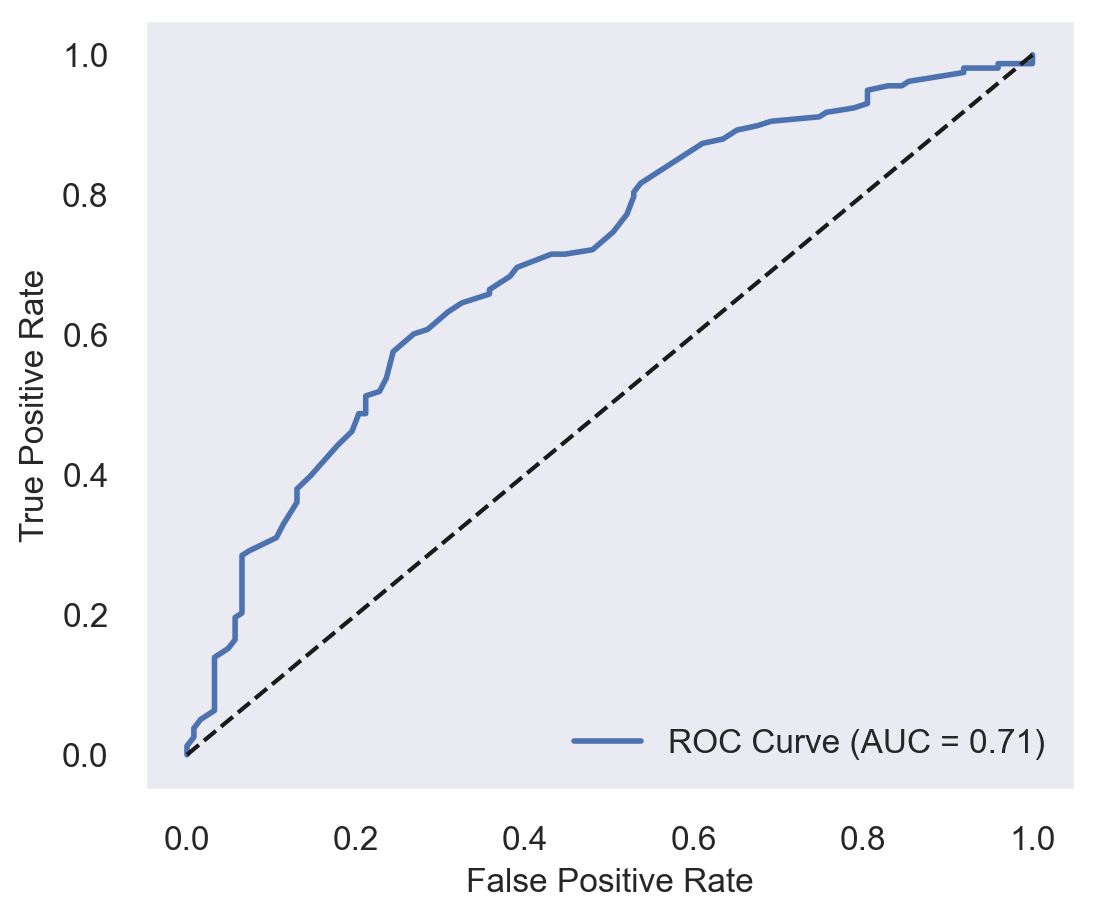

In [74]:
clinical_model = RandomForestClassifier(random_state=42)
clinical_acc, clinical_pre, clinical_rec, clinical_f1, clinical_auc = model_perfo(clinical_model, kfold, sig_clinical_train, sig_clinical_test, y_train, y_test)

                                          Features  Importance
2                      nottingham_prognostic_index    0.148053
0                                 age_at_diagnosis    0.142582
1                                   mutation_count    0.085776
4                type_of_breast_surgery_MASTECTOMY    0.021708
11                pam50_+_claudin-low_subtype_LumA    0.020946
56                   primary_tumor_laterality_Left    0.020369
57                  primary_tumor_laterality_Right    0.018784
25                   neoplasm_histologic_grade_3.0    0.018506
3         type_of_breast_surgery_BREAST CONSERVING    0.017953
66  3-gene_classifier_subtype_ER+/HER2- Low Prolif    0.016821

Top 10 of most important features: ['nottingham_prognostic_index', 'age_at_diagnosis', 'mutation_count', 'type_of_breast_surgery_MASTECTOMY', 'pam50_+_claudin-low_subtype_LumA', 'primary_tumor_laterality_Left', 'primary_tumor_laterality_Right', 'neoplasm_histologic_grade_3.0', 'type_of_breast_surgery_BREA

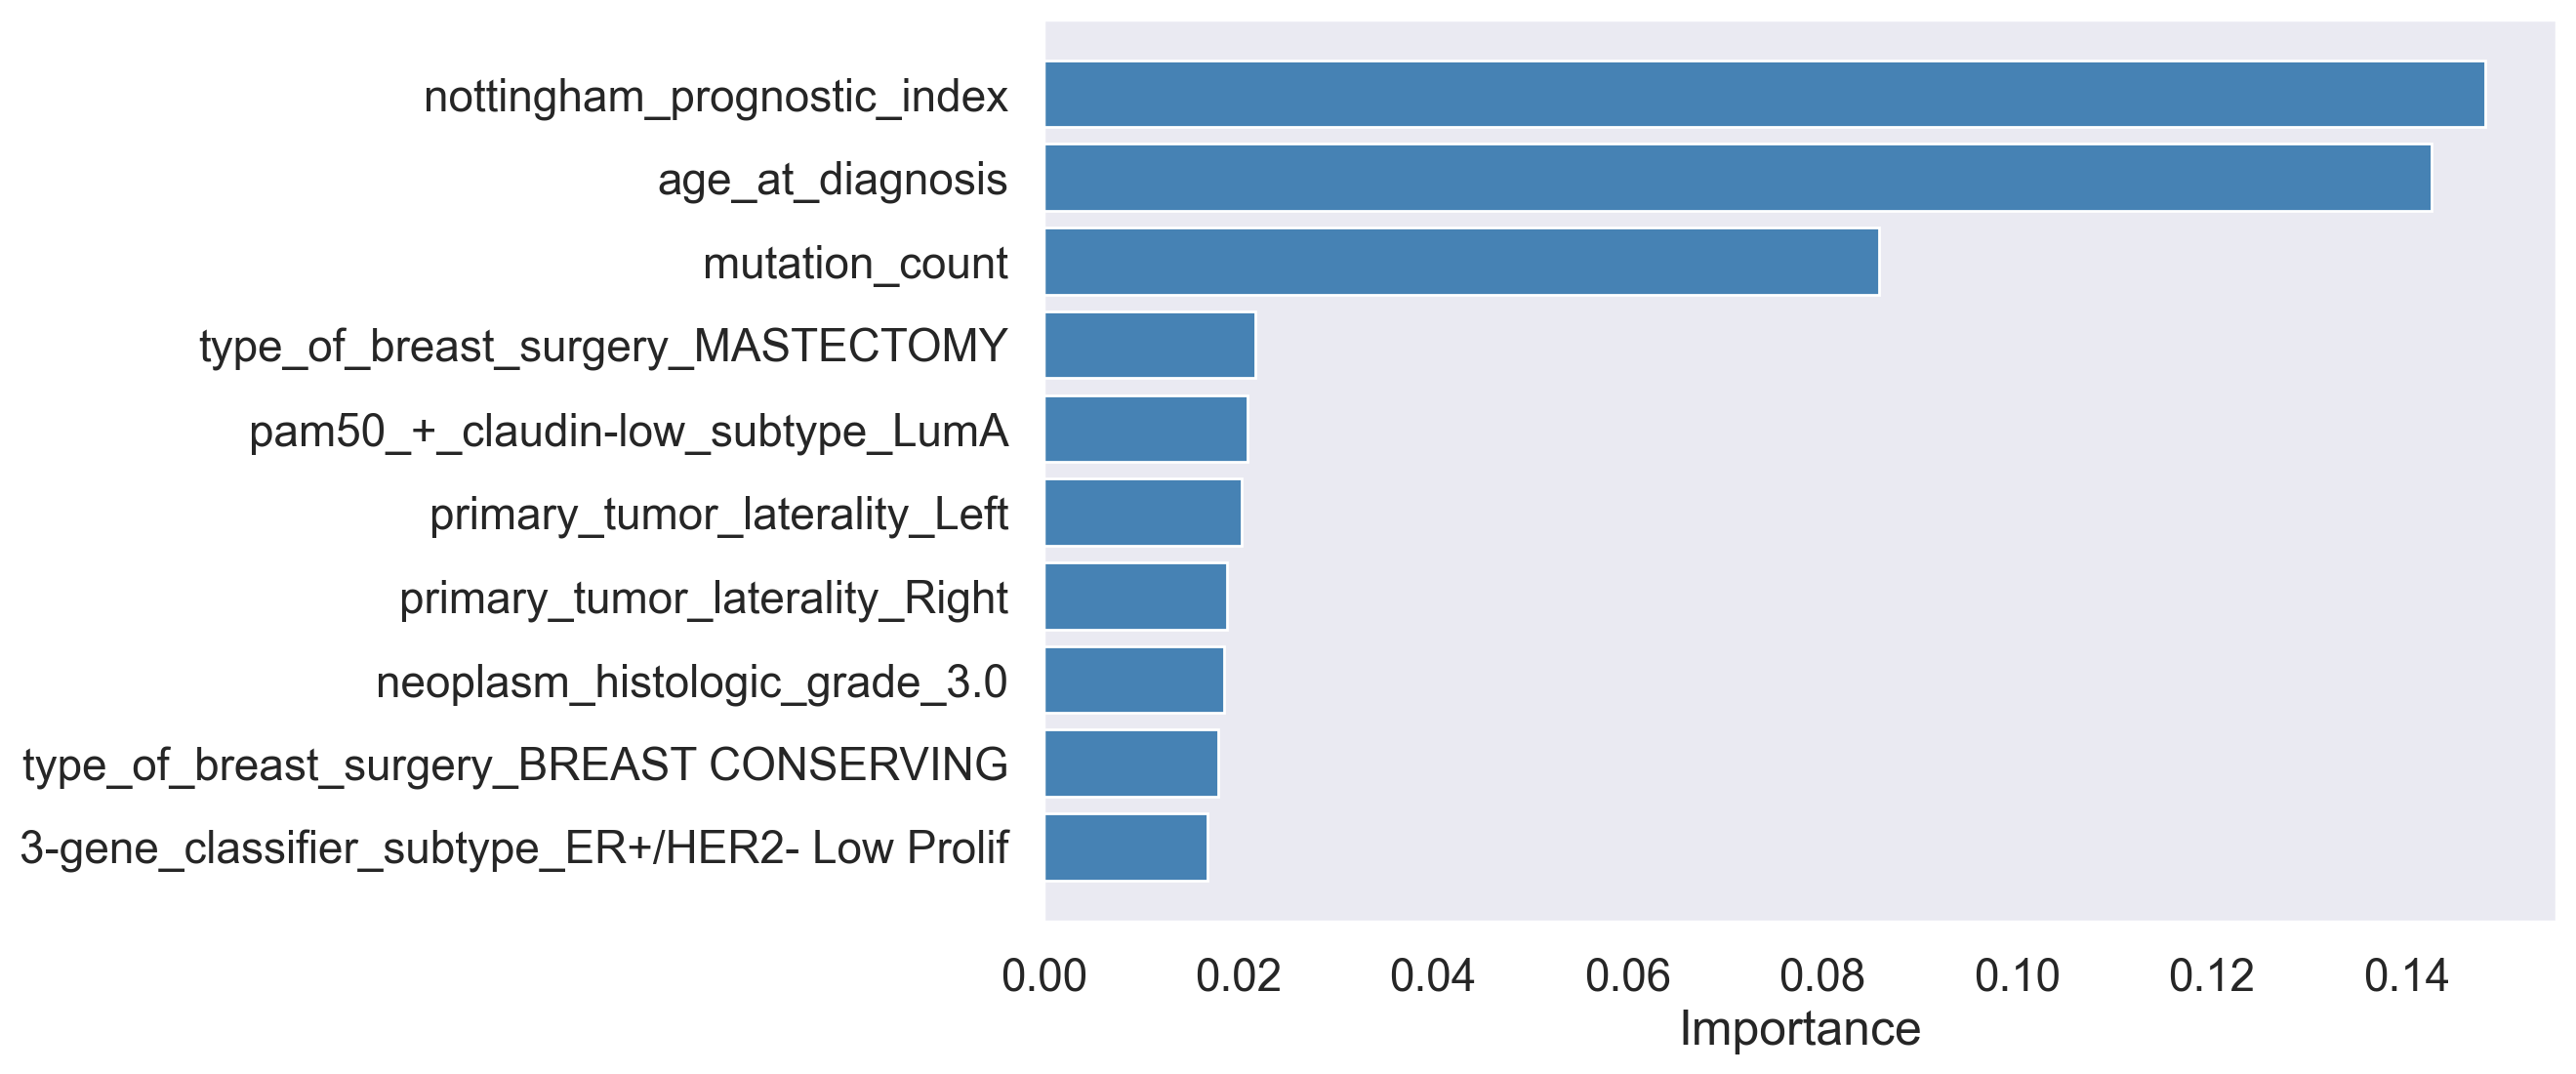

In [75]:
clinical_top = top_features(clinical_model, kfold, sig_clinical_train, sig_clinical_test, y_train, y_test)

In [76]:
fpr_clinical, tpr_clinical, _ = roc_curve(y_test, clinical_model.predict_proba(sig_clinical_test)[:,1])

### Genetic features

In [77]:
significant_genes

['bard1',
 'rb1',
 'myc',
 'cdkn1b',
 'stat2',
 'cir1',
 'casp3',
 'casp6',
 'casp9',
 'csf1r',
 'pdgfra',
 'ncor1',
 'asxl1',
 'birc6',
 'ncoa3',
 'rpgr',
 'sf3b1',
 'smarcd1',
 'hsd17b11',
 'nrip1',
 'tnk2',
 'nf1',
 'mlh1',
 'msh6',
 'pms2',
 'rbl1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdk2',
 'cdc25a',
 'ccnd2',
 'cdkn2b',
 'e2f2',
 'e2f3',
 'e2f7',
 'src',
 'jak1',
 'jak2',
 'stat1',
 'stat3',
 'stat5a',
 'stat5b',
 'aph1b',
 'arrdc1',
 'dtx2',
 'kdm5a',
 'maml1',
 'notch2',
 'notch3',
 'nrarp',
 'psen1',
 'rbpjl',
 'akt1',
 'apaf1',
 'aurka',
 'bcl2',
 'bcl2l1',
 'casp8',
 'chek1',
 'cxcr2',
 'diras3',
 'eif4ebp1',
 'eif5a2',
 'erbb2',
 'fas',
 'fgfr1',
 'folr2',
 'foxo3',
 'gdf11',
 'gsk3b',
 'hras',
 'igf1',
 'igf1r',
 'itgb3',
 'kit',
 'kras',
 'map2k2',
 'map2k3',
 'map2k4',
 'mapk14',
 'mapk7',
 'mmp1',
 'mmp11',
 'mmp12',
 'mmp15',
 'mmp25',
 'mmp3',
 'mmp9',
 'mtor',
 'nfkb1',
 'nfkb2',
 'pdgfb',
 'pik3r2',
 'ptk2',
 'rad51',
 'raf1',
 'rheb',
 'rps6',
 'rps6ka2',
 'rps6kb2',
 

In [78]:
sig_genetic_train = X_train[significant_genes]
sig_genetic_test = X_test[significant_genes]

Accuracy:  0.64

Confusion Matrix: 
[[ 67  56]
 [ 46 112]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.59      0.54      0.57       123
           1       0.67      0.71      0.69       158

    accuracy                           0.64       281
   macro avg       0.63      0.63      0.63       281
weighted avg       0.63      0.64      0.63       281


ROC_AUC: 0.67


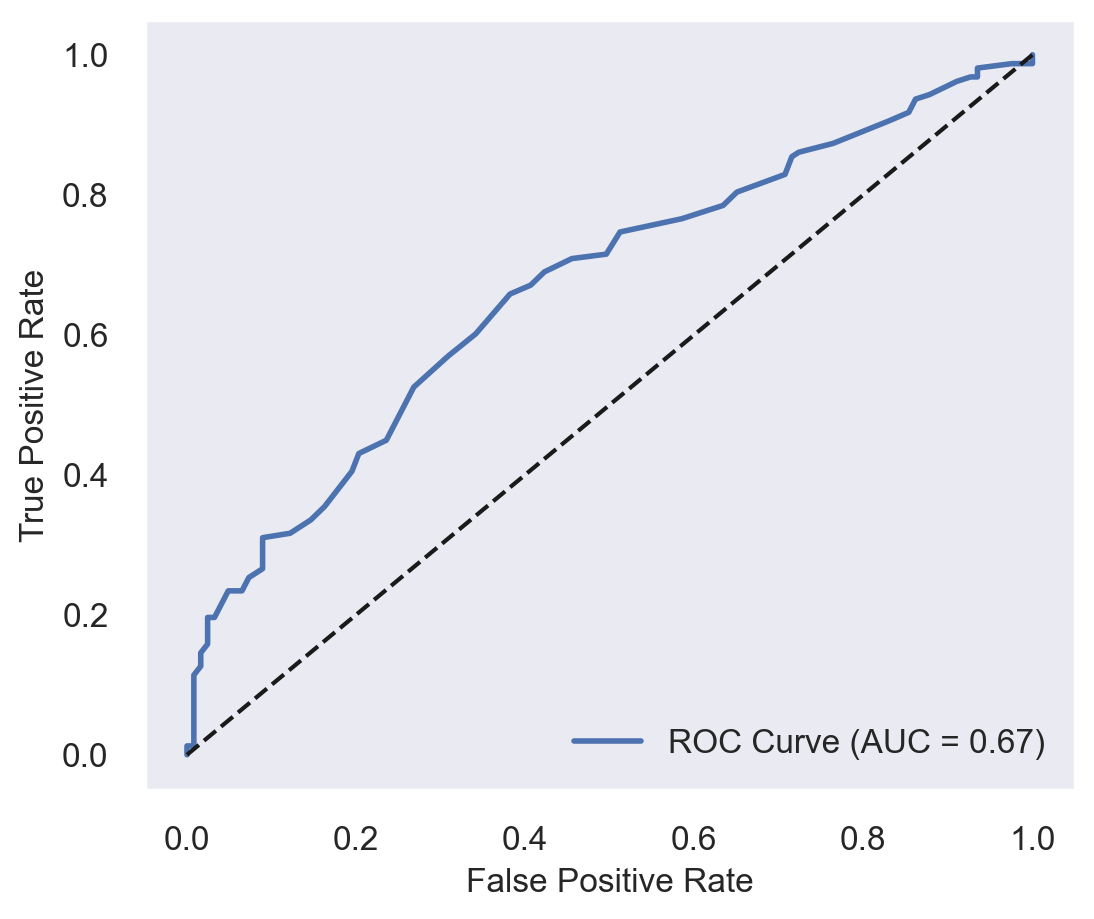

In [79]:
genetic_model = RandomForestClassifier(random_state=42)
genetic_acc, genetic_pre, genetic_rec, genetic_f1, genetic_auc = model_perfo(genetic_model, kfold,  sig_genetic_train, sig_genetic_test, y_train, y_test)

    Features  Importance
41    stat5a    0.018631
137     flt3    0.014877
70     gsk3b    0.013323
55     aurka    0.010739
14     ncoa3    0.009337
125     mapt    0.009265
133  col22a1    0.009146
33      e2f2    0.008349
92     pdgfb    0.008327
97      rheb    0.008311

Top 10 of most important features: ['stat5a', 'flt3', 'gsk3b', 'aurka', 'ncoa3', 'mapt', 'col22a1', 'e2f2', 'pdgfb', 'rheb']


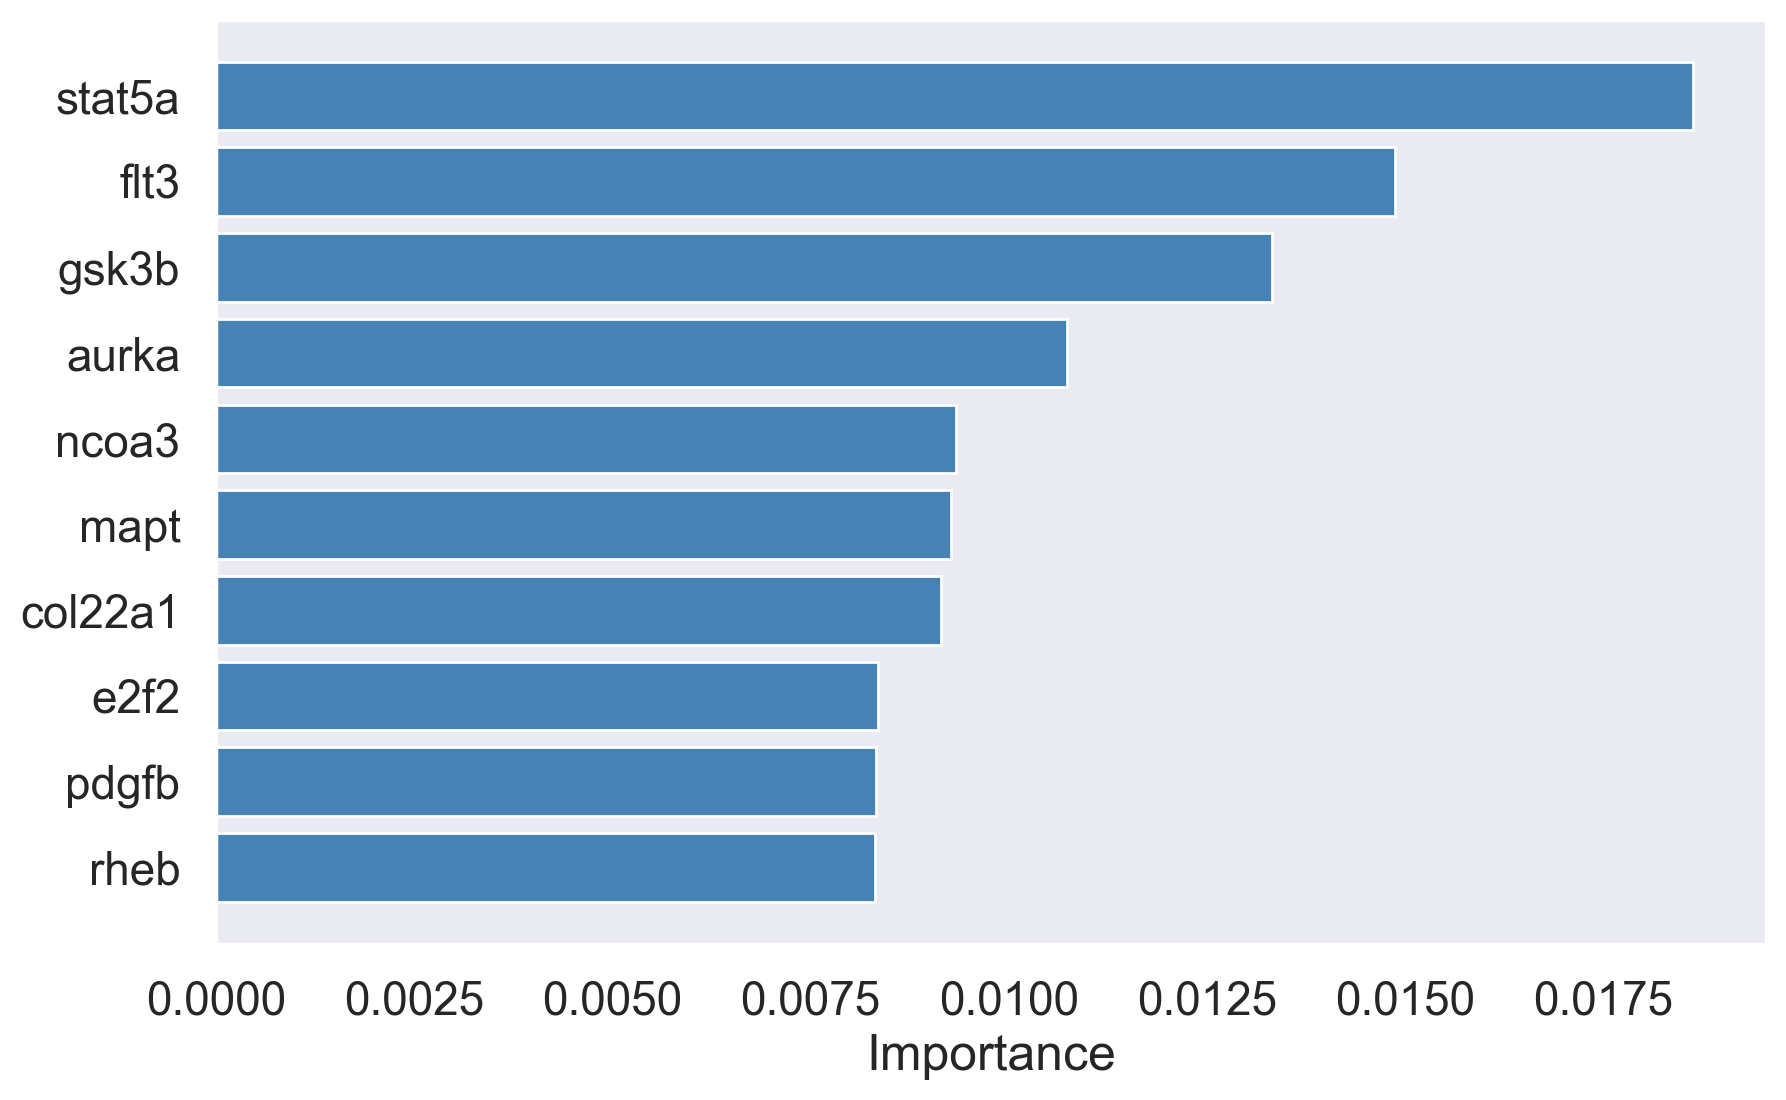

In [80]:
genetic_top = top_features(genetic_model, kfold, sig_genetic_train, sig_genetic_test, y_train, y_test)

In [81]:
fpr_genetic, tpr_genetic, _ = roc_curve(y_test, genetic_model.predict_proba(sig_genetic_test)[:,1])

### Gene mutations

In [82]:
significant_mutations

['tp53_mut',
 'muc16_mut',
 'gata3_mut',
 'dnah2_mut',
 'birc6_mut',
 'tbx3_mut',
 'cbfb_mut',
 'usp28_mut',
 'brca2_mut']

In [83]:
mut_train = X_train[significant_mutations]
mut_test = X_test[significant_mutations]
sig_mutation_train = mut_train.apply(pd.to_numeric, errors='coerce').fillna(1).astype(int)
sig_mutation_test = mut_test.apply(pd.to_numeric, errors='coerce').fillna(1).astype(int)

Accuracy:  0.54

Confusion Matrix: 
[[ 21 102]
 [ 26 132]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.45      0.17      0.25       123
           1       0.56      0.84      0.67       158

    accuracy                           0.54       281
   macro avg       0.51      0.50      0.46       281
weighted avg       0.51      0.54      0.49       281


ROC_AUC: 0.56


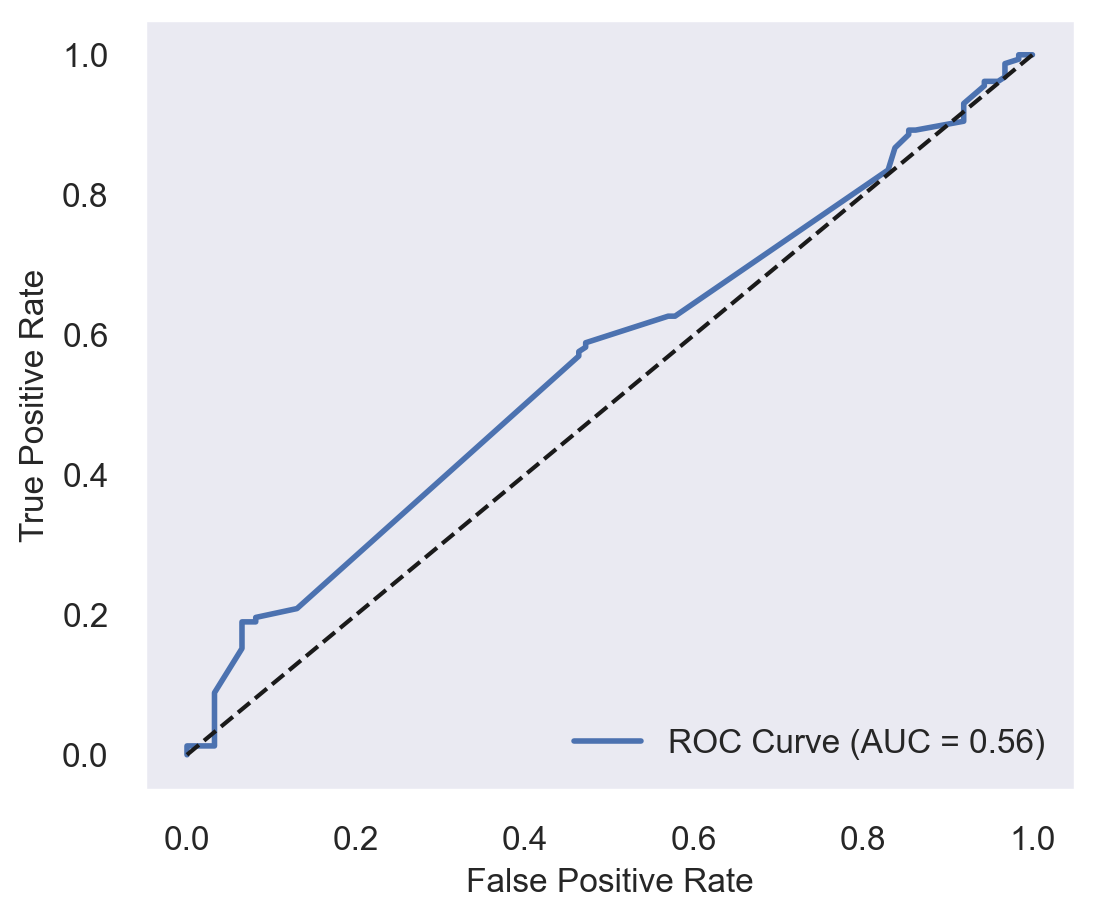

In [84]:
mutation_model = RandomForestClassifier(random_state=42)
mutation_acc, mutation_pre, mutation_rec, mutation_f1, mutation_auc = model_perfo(mutation_model, kfold,  sig_mutation_train, sig_mutation_test, y_train, y_test)

    Features  Importance
0   tp53_mut    0.202056
2  gata3_mut    0.148820
5   tbx3_mut    0.141113
4  birc6_mut    0.129385
1  muc16_mut    0.112801
3  dnah2_mut    0.073923
6   cbfb_mut    0.067108
8  brca2_mut    0.066701
7  usp28_mut    0.058094

Top 10 of most important features: ['tp53_mut', 'gata3_mut', 'tbx3_mut', 'birc6_mut', 'muc16_mut', 'dnah2_mut', 'cbfb_mut', 'brca2_mut', 'usp28_mut']


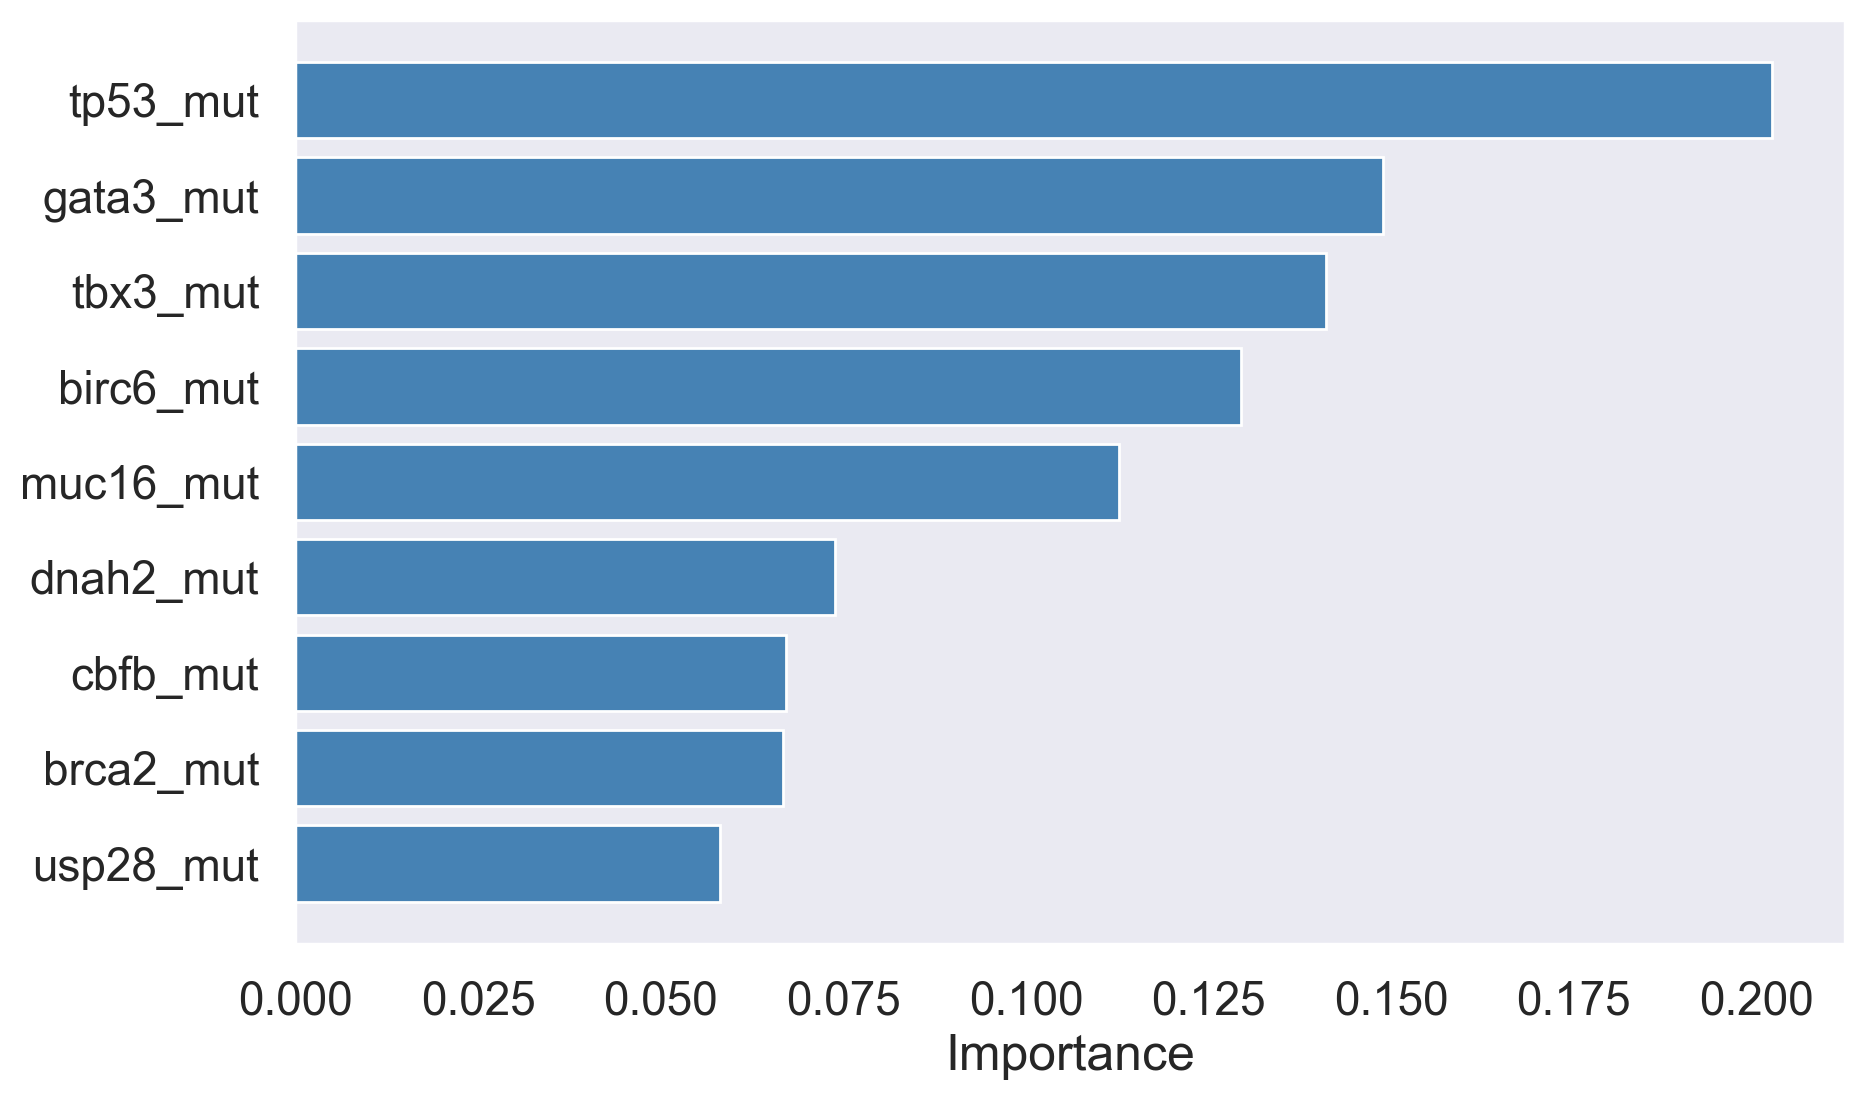

In [85]:
mutation_top = top_features(mutation_model, kfold, sig_mutation_train, sig_mutation_test, y_train, y_test)

In [86]:
fpr_mutation, tpr_mutation, _ = roc_curve(y_test, mutation_model.predict_proba(sig_mutation_test)[:,1])

### Combine clinical and gene expression

In [87]:
sig_combined_train = pd.concat([sig_clinical_train, sig_genetic_train], axis=1)
sig_combined_test = pd.concat([sig_clinical_test, sig_genetic_test], axis=1)

Accuracy:  0.67

Confusion Matrix: 
[[ 77  46]
 [ 48 110]]

Classification Report:  
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       123
           1       0.71      0.70      0.70       158

    accuracy                           0.67       281
   macro avg       0.66      0.66      0.66       281
weighted avg       0.67      0.67      0.67       281


ROC_AUC: 0.7


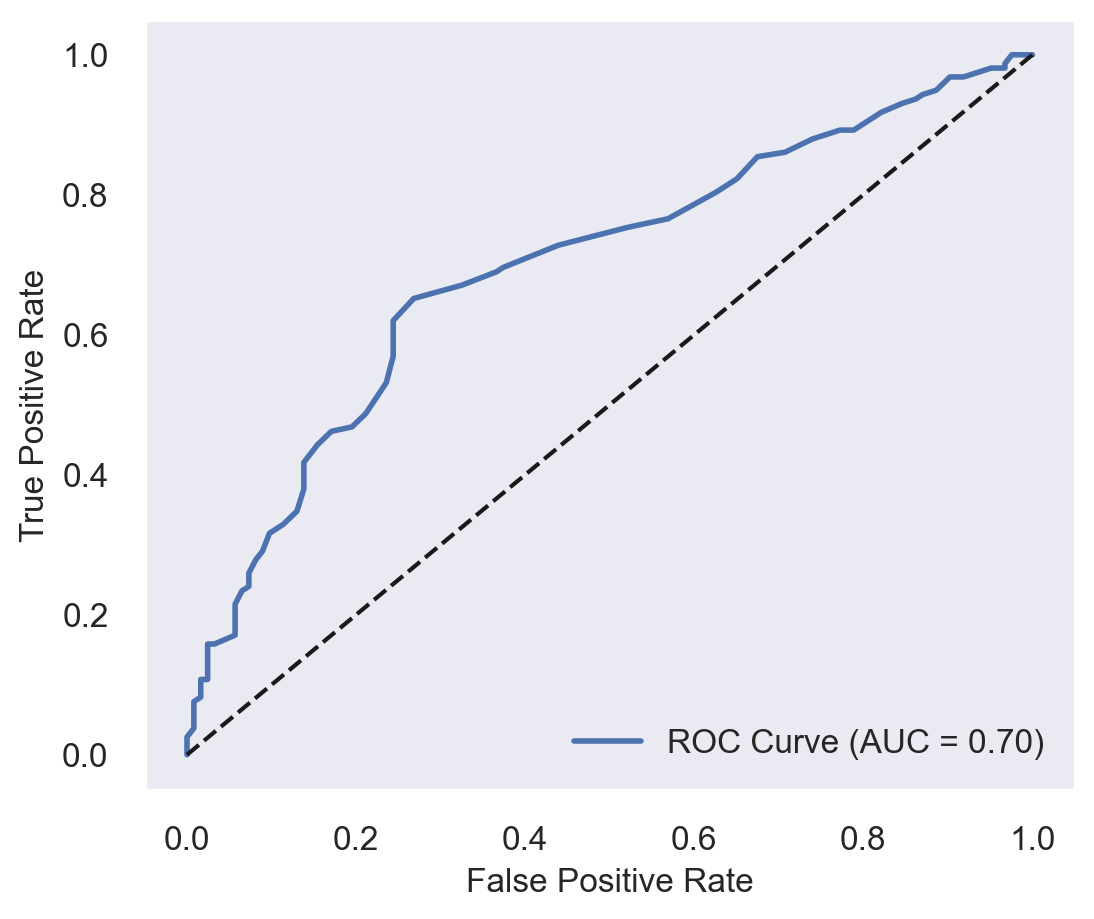

In [88]:
combined_model = RandomForestClassifier(random_state=42)
combined_acc, combined_pre, combined_rec, combined_f1, combined_auc = model_perfo(combined_model, kfold, sig_combined_train, sig_combined_test, y_train, y_test)

                        Features  Importance
2    nottingham_prognostic_index    0.023154
0               age_at_diagnosis    0.016889
117                       stat5a    0.015982
213                         flt3    0.011086
104                        ccne1    0.010327
146                        gsk3b    0.010049
90                         ncoa3    0.009716
131                        aurka    0.009310
176                      rps6kb2    0.008374
109                         e2f2    0.008130

Top 10 of most important features: ['nottingham_prognostic_index', 'age_at_diagnosis', 'stat5a', 'flt3', 'ccne1', 'gsk3b', 'ncoa3', 'aurka', 'rps6kb2', 'e2f2']


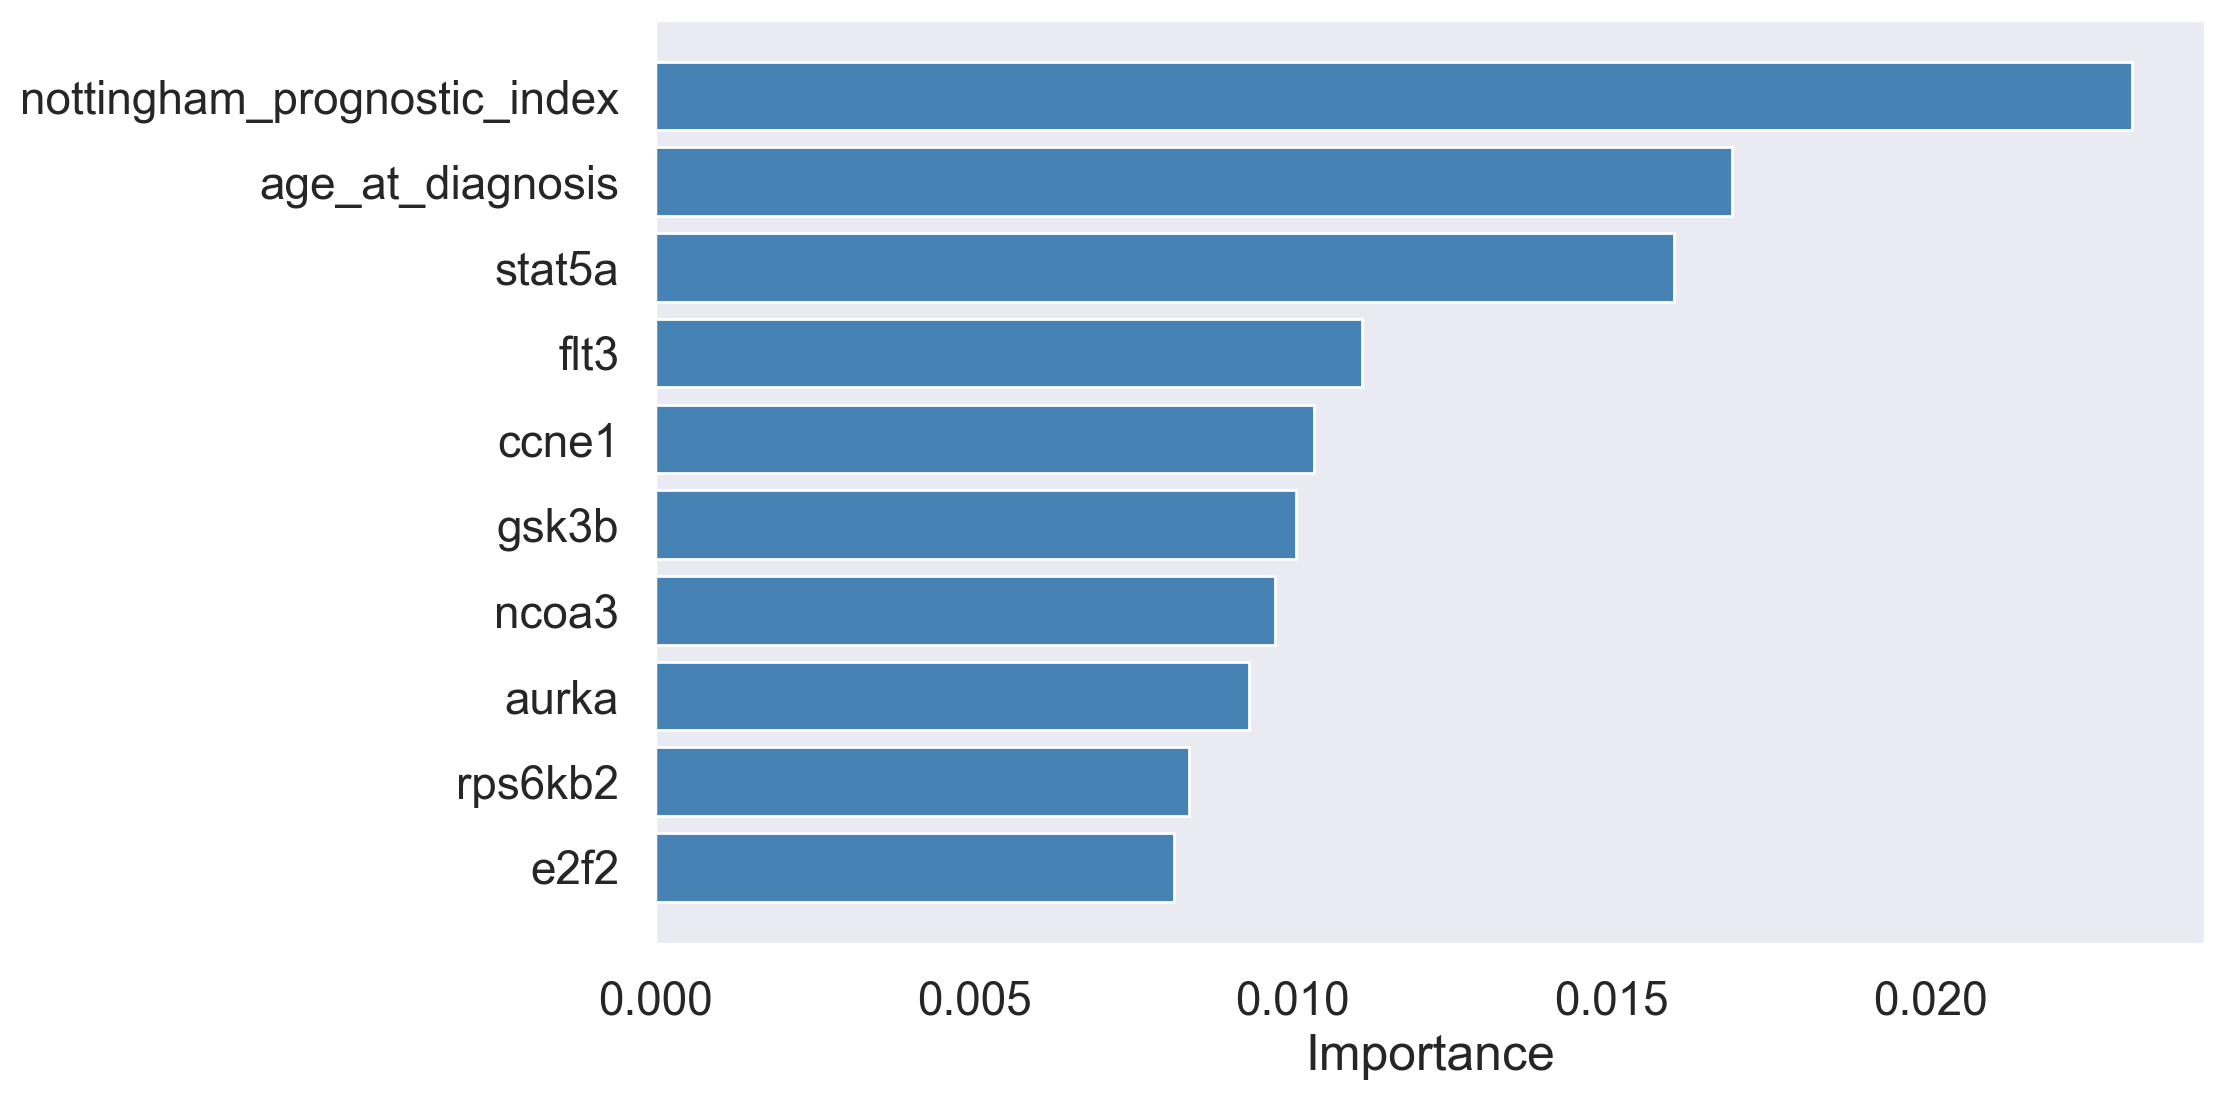

In [89]:
combined_top = top_features(combined_model, kfold, sig_combined_train, sig_combined_test, y_train, y_test)

In [90]:
fpr_combined, tpr_combined, _ = roc_curve(y_test, combined_model.predict_proba(sig_combined_test)[:,1])

## Top features selected

In [91]:
clinical = clinical_top['Features'].reset_index(drop=True)
expr = genetic_top['Features'].reset_index(drop=True)
mut = mutation_top['Features'].reset_index(drop=True)
comb = combined_top['Features'].reset_index(drop=True)

top_features = pd.concat(
    [
        clinical.rename('Clinical'),
        expr.rename('GeneExpression'),
        mut.rename('Mutation'),
        comb.rename('Combined')
    ],
    axis=1
)

top_features

Clinical GeneExpression   Mutation  \
0                     nottingham_prognostic_index         stat5a   tp53_mut   
1                                age_at_diagnosis           flt3  gata3_mut   
2                                  mutation_count          gsk3b   tbx3_mut   
3               type_of_breast_surgery_MASTECTOMY          aurka  birc6_mut   
4                pam50_+_claudin-low_subtype_LumA          ncoa3  muc16_mut   
5                   primary_tumor_laterality_Left           mapt  dnah2_mut   
6                  primary_tumor_laterality_Right        col22a1   cbfb_mut   
7                   neoplasm_histologic_grade_3.0           e2f2  brca2_mut   
8        type_of_breast_surgery_BREAST CONSERVING          pdgfb  usp28_mut   
9  3-gene_classifier_subtype_ER+/HER2- Low Prolif           rheb        NaN   

                      Combined  
0  nottingham_prognostic_index  
1             age_at_diagnosis  
2                       stat5a  
3                         flt3  
4                        ccne1  
5                        gsk3b  
6                        ncoa3  
7                        aurka  
8                      rps6kb2  
9                         e2f2

## Model performance

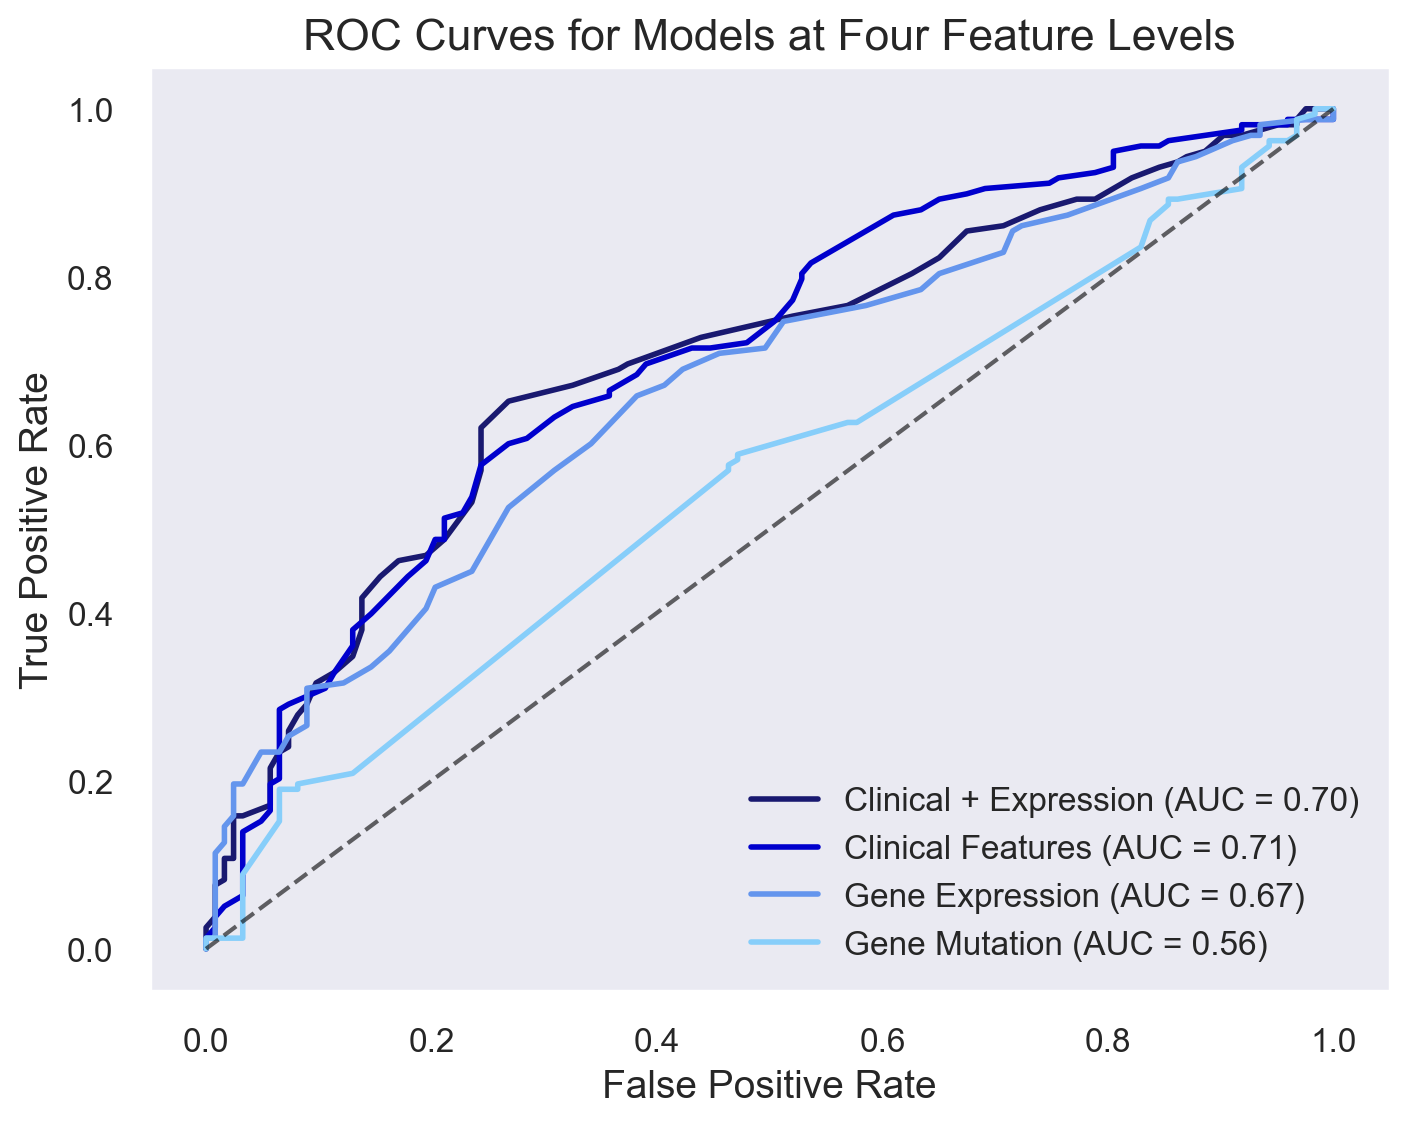

In [92]:
plt.figure(figsize=(8, 6))

# Combined model
plt.plot(fpr_combined, tpr_combined, 
         color='midnightblue',
         label=f"Clinical + Expression (AUC = {combined_auc:.2f})", linewidth=2)

# Clinical model
plt.plot(fpr_clinical, tpr_clinical, 
         color='mediumblue',
         label=f"Clinical Features (AUC = {clinical_auc:.2f})", linewidth=2)

# Gene expression model
plt.plot(fpr_genetic, tpr_genetic, 
         color='cornflowerblue',
         label=f"Gene Expression (AUC = {genetic_auc:.2f})", linewidth=2)

# Mutation model
plt.plot(fpr_mutation, tpr_mutation, 
         color='lightskyblue',
         label=f"Gene Mutation (AUC = {mutation_auc:.2f})", linewidth=2)

# Chance line
plt.plot([0, 1], [0, 1], linestyle="--", color="black", alpha=0.6)

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("ROC Curves for Models at Four Feature Levels", fontsize=16)
plt.legend(loc="lower right")
plt.grid(False)

plt.legend(loc="lower right", fontsize=12)
plt.show()

In [93]:
model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC_AUC'])

models = ['combined_model', 'clinical_model', 'genetic_model']
accuracies = [combined_acc, clinical_acc, genetic_acc]
precisions = [combined_pre, clinical_pre, genetic_pre]
recalls = [combined_rec, clinical_rec, genetic_rec]
f1_scores = [combined_f1, clinical_f1, genetic_f1]
roc_aucs = [combined_auc, clinical_auc, genetic_auc]

for i in range(len(models)):
    model_performance.loc[i] = [models[i], round(accuracies[i], 2), round(precisions[i], 2), round(recalls[i], 2), round(f1_scores[i], 2), round(roc_aucs[i], 2)]

model_performance

Model  Accuracy  Precision  Recall  F1-score  ROC_AUC
0  combined_model      0.67       0.71    0.70      0.70     0.70
1  clinical_model      0.65       0.68    0.72      0.70     0.71
2   genetic_model      0.64       0.67    0.71      0.69     0.67

## Evaluate Survival Probability Predictions

In [94]:
surv_prob = combined_model.predict_proba(sig_combined_test)[:, 1] 

In [95]:
brier = brier_score_loss(y_test, surv_prob)
print("Brier Score:", brier)

Brier Score: 0.2192288256227758


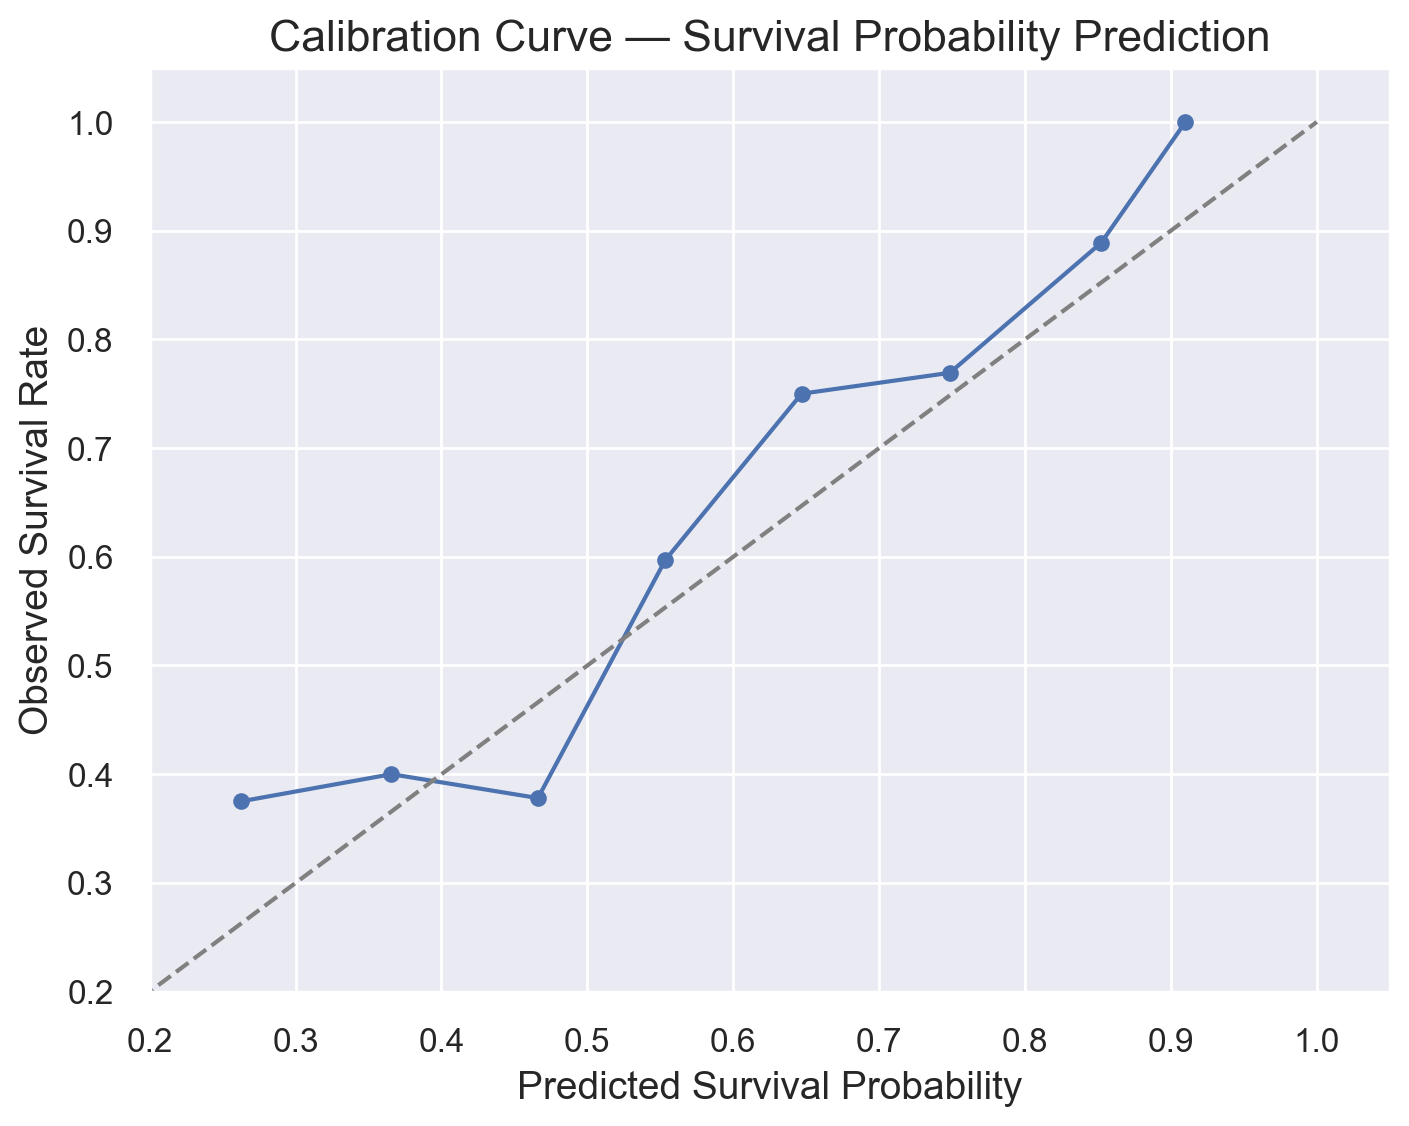

In [96]:
prob_true, prob_pred = calibration_curve(y_test, surv_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("Predicted Survival Probability", fontsize=14)
plt.ylabel("Observed Survival Rate", fontsize=14)
plt.xlim(0.2, )
plt.ylim(0.2, )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Calibration Curve — Survival Probability Prediction", fontsize=16)
plt.show()

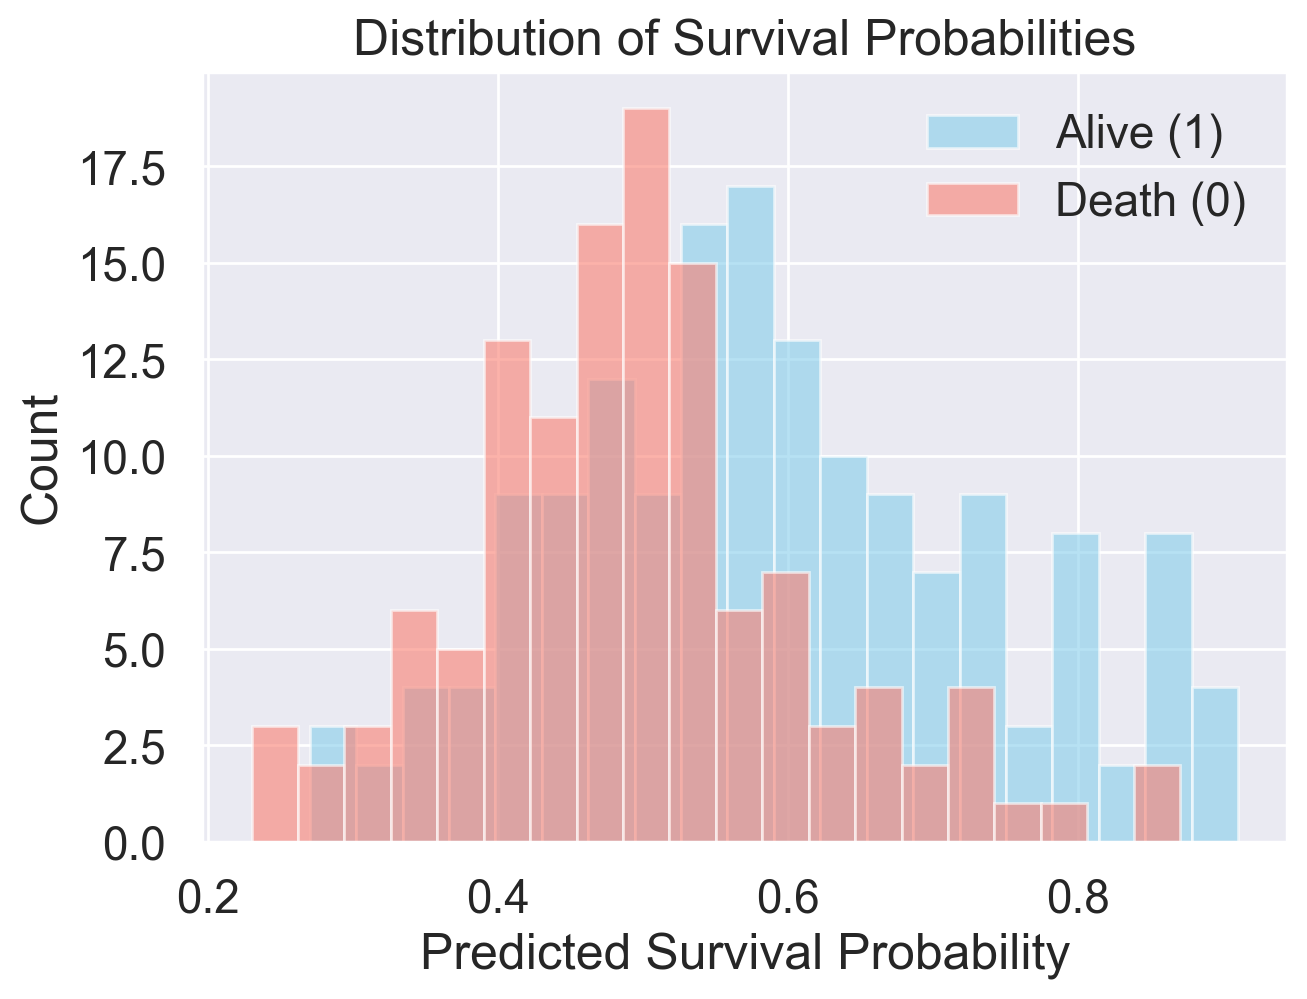

In [97]:
df = pd.DataFrame({
    "surv_prob": surv_prob,
    "outcome": y_test.values  # 1 = live, 0 = death
})

plt.figure(figsize=(7,5))
plt.hist(df[df.outcome == 1].surv_prob, bins=20, alpha=0.6, label="Alive (1)", color="skyblue")
plt.hist(df[df.outcome == 0].surv_prob, bins=20, alpha=0.6, label="Death (0)", color="salmon")
plt.xlabel("Predicted Survival Probability")
plt.ylabel("Count")
plt.title("Distribution of Survival Probabilities")
plt.legend()
plt.show()